* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-12-27


In [2]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import urlparse, parse_qs
from getpass import getpass
import threading
import time
import pandas as pd
import numpy as np


In [3]:
# chrome driver options
options = webdriver.ChromeOptions()
# options.add_argument("headless")
options.add_experimental_option(
    "prefs",
    {
        "download.default_directory": "./dataset_created",
        "download.prompt_for_download": False,
        "download.directory_upgrade": True,
        "safebrowsing.enabled": True,
    },
)
driver = webdriver.Chrome("./chromedriver", options=options)


In [4]:
# target url for the covid19 data: Seoul City
# url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do#status_page_top"

In [27]:
driver.get(url)

In [6]:
# paginate_item = driver.find_elements_by_class_name("paginate_button")
# len(paginate_item)

In [28]:
button_last_page = driver.find_element_by_xpath('//*[@id="DataTables_Table_0_paginate"]/span/a[6]')
str_last_index = button_last_page.text
int_last_index = int(str_last_index)
int_last_index

75

In [26]:
paginate_next = driver.find_element_by_xpath('//*[@id="DataTables_Table_0_next"]')
paginate_next.click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=87.0.4280.88)


In [17]:
# read all table datas in the web html template
tables = pd.read_html(driver.page_source)
len(tables)

92

In [18]:
list_patient_data_100 = []

for table in tables:
    if "연번" in table:
        list_patient_data_100.append(table)

In [20]:
list_patient_data_100[0]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17330,56635,12.26.,용산구,-,감염경로 조사중,NaN
1,17329,56632,12.26.,영등포구,-,감염경로 조사중,NaN
2,17328,56628,12.26.,금천구,-,기타 확진자 접촉,NaN
3,17327,56610,12.26.,서초구,-,기타 확진자 접촉,NaN
4,17326,56608,12.26.,타시도,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,17235,56866,12.26.,용산구,-,감염경로 조사중,NaN
96,17234,56254,12.26.,양천구,-,기타 확진자 접촉,NaN
97,17233,56864,12.26.,서초구,-,기타 확진자 접촉,NaN
98,17232,591028,12.26.,구로구,-,구로구 소재 요양병원 관련,NaN


In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import urlparse, parse_qs
from getpass import getpass
import threading
import time
import pandas as pd
import numpy as np

# chrome driver options
options = webdriver.ChromeOptions()
# options.add_argument("headless")
options.add_experimental_option(
    "prefs",
    {
        "download.default_directory": "./dataset_created",
        "download.prompt_for_download": False,
        "download.directory_upgrade": True,
        "safebrowsing.enabled": True,
    },
)
driver = webdriver.Chrome("./chromedriver", options=options)


# get url
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do#status_page_top"
driver.get(url)

# get the last page as index range
button_last_page = driver.find_element_by_xpath('//*[@id="DataTables_Table_0_paginate"]/span/a[6]')
str_last_index = button_last_page.text
int_last_index = int(str_last_index)

list_patient_data_total = []

for num in range(int_last_index):
    list_patient_data_100 = []
    # get first page table
    tables = pd.read_html(driver.page_source)

    for table in tables:
        if "연번" in table:
            list_patient_data_100.append(table)

    display(list_patient_data_100[0])
    list_patient_data_total.append(list_patient_data_100[0])

    button_paginate_next = driver.find_element_by_xpath('//*[@id="DataTables_Table_0_next"]')
    button_paginate_next.click()
    time.sleep(1.5)

Today's date: 2020-12-27


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN
3,17427,56806,12.26.,기타,-,동부구치소 관련,NaN
4,17426,56817,12.26.,기타,-,동부구치소 관련,NaN
...,...,...,...,...,...,...,...
95,17335,56644,12.26.,종로구,-,기타 확진자 접촉,NaN
96,17334,56643,12.26.,종로구,-,기타 확진자 접촉,NaN
97,17333,56642,12.26.,종로구,-,기타 확진자 접촉,NaN
98,17332,56641,12.26.,종로구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17330,56635,12.26.,용산구,-,감염경로 조사중,NaN
1,17329,56632,12.26.,영등포구,-,감염경로 조사중,NaN
2,17328,56628,12.26.,금천구,-,기타 확진자 접촉,NaN
3,17327,56610,12.26.,서초구,-,기타 확진자 접촉,NaN
4,17326,56608,12.26.,타시도,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,17235,56866,12.26.,용산구,-,감염경로 조사중,NaN
96,17234,56254,12.26.,양천구,-,기타 확진자 접촉,NaN
97,17233,56864,12.26.,서초구,-,기타 확진자 접촉,NaN
98,17232,591028,12.26.,구로구,-,구로구 소재 요양병원 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17230,56861,12.26.,양천구,-,기타 확진자 접촉,NaN
1,17229,56860,12.26.,금천구,-,금천구 소재 교회 관련,NaN
2,17228,56859,12.26.,도봉구,-,타시도 확진자 접촉,NaN
3,17227,56858,12.26.,타시도,-,구로구 소재 요양병원 관련,NaN
4,17226,56857,12.26.,관악구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,17135,56326,12.26.,중랑구,-,감염경로 조사중,NaN
96,17134,56325,12.26.,강서구,-,감염경로 조사중,NaN
97,17133,56323,12.26.,중랑구,-,감염경로 조사중,NaN
98,17132,56322,12.26.,강서구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17130,56319,12.26.,종로구,-,감염경로 조사중,NaN
1,17129,56317,12.26.,양천구,-,기타 확진자 접촉,NaN
2,17128,56316,12.26.,양천구,-,기타 확진자 접촉,NaN
3,17127,56315,12.26.,마포구,-,기타 확진자 접촉,NaN
4,17126,56313,12.26.,송파구,-,송파구 소재 장애인 생활시설 관련,NaN
...,...,...,...,...,...,...,...
95,17035,55249,12.25.,중랑구,-,감염경로 조사중,NaN
96,17034,55228,12.25.,기타,-,기타 확진자 접촉,NaN
97,17033,55113,12.25.,동작구,-,기타 확진자 접촉,NaN
98,17032,미부여,12.25.,양천구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17030,54877,12.25.,관악구,-,기타 확진자 접촉,NaN
1,17029,미부여,12.25.,서초구,-,기타 확진자 접촉,NaN
2,17028,54872,12.25.,용산구,-,감염경로 조사중,NaN
3,17027,54828,12.25.,마포구,-,기타 확진자 접촉,NaN
4,17026,54793,12.25.,종로구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,16935,55586,12.25.,구로구,-,기타 확진자 접촉,NaN
96,16934,55565,12.25.,구로구,-,기타 확진자 접촉,NaN
97,16933,55599,12.25.,구로구,-,기타 확진자 접촉,NaN
98,16932,55576,12.25.,구로구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16930,55244,12.25.,동대문구,-,기타 확진자 접촉,NaN
1,16929,55522,12.25.,광진구,-,감염경로 조사중,NaN
2,16928,54886,12.25.,타시도,-,기타 확진자 접촉,NaN
3,16927,55520,12.25.,은평구,-,감염경로 조사중,NaN
4,16926,55521,12.25.,은평구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,16835,55227,12.25.,양천구,-,양천구 소재 요양시설 관련,NaN
96,16834,55226,12.25.,양천구,-,양천구 소재 요양시설 관련,NaN
97,16833,55225,12.25.,양천구,-,양천구 소재 요양시설 관련,NaN
98,16832,55143,12.25.,양천구,-,양천구 소재 요양시설 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16830,55264,12.25.,강서구,-,양천구 소재 요양시설 관련,NaN
1,16829,55056,12.25.,강서구,-,양천구 소재 요양시설 관련,NaN
2,16828,55223,12.25.,양천구,-,양천구 소재 요양시설 관련,NaN
3,16827,55268,12.25.,양천구,-,양천구 소재 요양시설 관련,NaN
4,16826,55266,12.25.,양천구,-,양천구 소재 요양시설 관련,NaN
...,...,...,...,...,...,...,...
95,16735,55194,12.25.,강동구,-,기타 확진자 접촉,NaN
96,16734,55197,12.25.,강동구,-,감염경로 조사중,NaN
97,16733,55413,12.25.,동작구,-,기타 확진자 접촉,NaN
98,16732,55674,12.25.,타시도,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16730,55675,12.25.,타시도,-,감염경로 조사중,NaN
1,16729,55341,12.25.,관악구,-,감염경로 조사중,NaN
2,16728,54921,12.25.,구로구,-,기타 확진자 접촉,NaN
3,16727,55167,12.25.,은평구,-,기타 확진자 접촉,NaN
4,16726,54939,12.25.,은평구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,16635,55285,12.25.,타시도,-,타시도 확진자 접촉,NaN
96,16634,55169,12.25.,용산구,-,기타 확진자 접촉,NaN
97,16633,55700,12.25.,용산구,-,기타 확진자 접촉,NaN
98,16632,55170,12.25.,용산구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16630,55077,12.25.,광진구,-,감염경로 조사중,NaN
1,16629,55076,12.25.,동작구,-,기타 확진자 접촉,NaN
2,16628,55082,12.25.,동작구,-,기타 확진자 접촉,NaN
3,16627,55084,12.25.,동작구,-,기타 확진자 접촉,NaN
4,16626,55079,12.25.,동작구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,16535,54747,12.24.,기타,-,동부구치소,NaN
96,16534,54746,12.24.,기타,-,동부구치소,NaN
97,16533,54745,12.24.,기타,-,동부구치소,NaN
98,16532,54744,12.24.,기타,-,동부구치소,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16530,54742,12.24.,기타,-,동부구치소,NaN
1,16529,54741,12.24.,기타,-,동부구치소,NaN
2,16528,54740,12.24.,기타,-,동부구치소,NaN
3,16527,54588,12.24.,기타,-,동부구치소,NaN
4,16526,54587,12.24.,기타,-,동부구치소,NaN
...,...,...,...,...,...,...,...
95,16435,54681,12.24.,기타,-,동부구치소,NaN
96,16434,54680,12.24.,기타,-,동부구치소,NaN
97,16433,54679,12.24.,기타,-,동부구치소,NaN
98,16432,54512,12.24.,기타,-,동부구치소,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16430,54504,12.24.,기타,-,동부구치소,NaN
1,16429,54654,12.24.,기타,-,동부구치소,NaN
2,16428,54653,12.24.,기타,-,동부구치소,NaN
3,16427,54650,12.24.,기타,-,동부구치소,NaN
4,16426,54769,12.24.,기타,-,동부구치소,NaN
...,...,...,...,...,...,...,...
95,16335,54475,12.24.,기타,-,동부구치소,NaN
96,16334,54472,12.24.,기타,-,동부구치소,NaN
97,16333,54470,12.24.,기타,-,동부구치소,NaN
98,16332,54466,12.24.,기타,-,동부구치소,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16330,54463,12.24.,기타,-,동부구치소,NaN
1,16329,54461,12.24.,기타,-,동부구치소,NaN
2,16328,54460,12.24.,기타,-,동부구치소,NaN
3,16327,54459,12.24.,기타,-,동부구치소,NaN
4,16326,54458,12.24.,기타,-,동부구치소,NaN
...,...,...,...,...,...,...,...
95,16235,54368,12.24.,도봉구,-,기타 확진자 접촉,NaN
96,16234,54373,12.24.,마포구,-,감염경로 조사중,NaN
97,16233,54358,12.24.,은평구,-,감염경로 조사중,NaN
98,16232,54362,12.24.,광진구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16230,54384,12.24.,광진구,-,기타 확진자 접촉,NaN
1,16229,54366,12.24.,영등포구,-,감염경로 조사중,NaN
2,16228,54237,12.24.,중구,-,기타 확진자 접촉,NaN
3,16227,54415,12.24.,마포구,-,감염경로 조사중,NaN
4,16226,54417,12.24.,마포구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,16135,54254,12.24.,금천구,-,감염경로 조사중,NaN
96,16134,54423,12.24.,성북구,-,감염경로 조사중,NaN
97,16133,54434,12.24.,성북구,-,감염경로 조사중,NaN
98,16132,54382,12.24.,성북구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16130,54418,12.24.,성북구,-,강남구 개인사저 경비팀,NaN
1,16129,54386,12.24.,성북구,-,감염경로 조사중,NaN
2,16128,54278,12.24.,중랑구,-,기타 확진자 접촉,NaN
3,16127,54442,12.24.,중랑구,-,기타 확진자 접촉,NaN
4,16126,54283,12.24.,중랑구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,16035,52828,12.23.,구로구,-,감염경로 조사중,NaN
96,16034,53067,12.23.,종로구,-,기타 확진자 접촉,NaN
97,16033,52861,12.23.,서초구,-,감염경로 조사중,NaN
98,16032,52945,12.23.,구로구,-,금천구 소재 교회 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,16030,53159.0,12.23.,종로구,-,기타 확진자 접촉,NaN
1,16029,53296.0,12.23.,타시도,-,감염경로 조사중,NaN
2,16028,53009.0,12.23.,마포구,-,기타 확진자 접촉,NaN
3,16027,53239.0,12.23.,종로구,-,감염경로 조사중,NaN
4,16026,52975.0,12.23.,마포구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,15935,53098.0,12.23.,강서구,-,감염경로 조사중,NaN
96,15934,53301.0,12.23.,노원구,-,감염경로 조사중,NaN
97,15933,52832.0,12.23.,송파구,-,감염경로 조사중,NaN
98,15932,53008.0,12.23.,양천구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15930,52882.0,12.23.,성북구,-,강남구 개인사저 경비팀,NaN
1,15929,52672.0,12.23.,마포구,-,감염경로 조사중,NaN
2,15928,52933.0,12.23.,도봉구,-,감염경로 조사중,NaN
3,15927,53158.0,12.23.,송파구,-,감염경로 조사중,NaN
4,15926,53291.0,12.23.,구로구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,15835,53258.0,12.23.,영등포구,-,감염경로 조사중,NaN
96,15834,53185.0,12.23.,강서구,-,동부구치소 관련,NaN
97,15833,52993.0,12.23.,노원구,-,강동구 지인모임 관련,NaN
98,15832,52968.0,12.23.,은평구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15830,53198,12.23.,서대문구,-,감염경로 조사중,NaN
1,15829,53195,12.23.,송파구,-,감염경로 조사중,NaN
2,15828,53298,12.23.,성동구,-,감염경로 조사중,NaN
3,15827,52682,12.23.,성동구,-,기타 확진자 접촉,NaN
4,15826,52965,12.23.,동대문구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,15735,53341,12.23.,타시도,-,구로구 소재 요양병원 관련,NaN
96,15734,53345,12.23.,동대문구,-,구로구 소재 요양병원 관련,NaN
97,15733,52888,12.23.,구로구,-,구로구 소재 요양병원 관련,NaN
98,15732,53355,12.23.,구로구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15730,52186,12.22.,NaN,-,구로구 소재 요양병원 관련,NaN
1,15729,51925,12.22.,NaN,-,-,NaN
2,15728,51709,12.22.,NaN,-,-,NaN
3,15727,51844,12.22.,노원구,-,노원구 병원 관련(강북연세병원),NaN
4,15726,51919,12.22.,강남구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,15635,51640,12.22.,용산구,-,기타 확진자 접촉,NaN
96,15634,52054,12.22.,노원구,-,타시도 확진자 접촉,NaN
97,15633,52210,12.22.,중랑구,-,감염경로 조사중,NaN
98,15632,52392,12.22.,마포구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15630,52149,12.22.,강동구,-,기타,NaN
1,15629,52208,12.22.,송파구,-,기타,NaN
2,15628,52399,12.22.,마포구,-,기타 확진자 접촉,NaN
3,15627,51838,12.22.,송파구,-,감염경로 조사중,NaN
4,15626,52351,12.22.,은평구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,15535,52482,12.22.,광진구,-,기타,NaN
96,15534,52447,12.22.,관악구,-,감염경로 조사중,NaN
97,15533,52240,12.22.,영등포구,-,감염경로 조사중,NaN
98,15532,51974,12.22.,송파구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15530,51661,12.22.,관악구,-,기타 확진자 접촉,NaN
1,15529,52381,12.22.,중랑구,-,감염경로 조사중,NaN
2,15528,51784,12.22.,강북구,-,기타 확진자 접촉,NaN
3,15527,51790,12.22.,서대문구,-,기타 확진자 접촉,NaN
4,15526,52306,12.22.,노원구,-,노원구 병원 관련(강북연세병원),NaN
...,...,...,...,...,...,...,...
95,15435,51943,12.22.,노원구,-,기타,NaN
96,15434,52298,12.22.,종로구,-,기타,NaN
97,15433,51825,12.22.,서대문구,-,기타 확진자 접촉,NaN
98,15432,52452,12.22.,광진구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15430,51886,12.22.,노원구,-,감염경로 조사중,NaN
1,15429,51676,12.22.,성동구,-,기타 확진자 접촉,NaN
2,15428,51948,12.22.,양천구,-,기타,NaN
3,15427,51672,12.22.,성동구,-,감염경로 조사중,NaN
4,15426,52086,12.22.,동작구,-,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,15335,51206,12.21.,타시도,-,기타 확진자 접촉,NaN
96,15334,51029,12.21.,노원구,-,기타 확진자 접촉,NaN
97,15333,50980,12.21.,노원구,-,기타 확진자 접촉,NaN
98,15332,51030,12.21.,노원구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15330,51053,12.21.,구로구,-,기타 확진자 접촉,NaN
1,15329,50979,12.21.,구로구,-,기타 확진자 접촉,NaN
2,15328,50970,12.21.,구로구,-,기타 확진자 접촉,NaN
3,15327,50968,12.21.,구로구,-,기타 확진자 접촉,NaN
4,15326,50882,12.21.,구로구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,15235,51247,12.21.,노원구,-,기타 확진자 접촉,NaN
96,15234,51227,12.21.,노원구,-,기타 확진자 접촉,NaN
97,15233,51251,12.21.,노원구,-,감염경로 조사중,NaN
98,15232,50817,12.21.,노원구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15230,51286,12.21.,노원구,-,감염경로 조사중,NaN
1,15229,51049,12.21.,노원구,-,감염경로 조사중,NaN
2,15228,50899,12.21.,노원구,-,감염경로 조사중,NaN
3,15227,51079,12.21.,노원구,-,감염경로 조사중,NaN
4,15226,51072,12.21.,구로구,-,구로구 소재 요양병원 관련,NaN
...,...,...,...,...,...,...,...
95,15135,51098,12.21.,타시도,-,기타 확진자 접촉,NaN
96,15134,50879,12.21.,종로구,-,감염경로 조사중,NaN
97,15133,50908,12.21.,종로구,-,감염경로 조사중,NaN
98,15132,50894,12.21.,영등포구,-,타시도 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15130,51232,12.21.,관악구,-,감염경로 조사중,NaN
1,15129,51231,12.21.,관악구,-,기타 확진자 접촉,NaN
2,15128,51039,12.21.,서초구,-,기타 확진자 접촉,NaN
3,15127,50944,12.21.,서초구,-,기타 확진자 접촉,NaN
4,15126,50813,12.21.,서초구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,15035,49862,12.20.,강동구,-,감염경로 조사중,NaN
96,15034,50076,12.20.,구로구,-,기타 확진자 접촉,NaN
97,15033,49824,12.20.,서초구,-,감염경로 조사중,NaN
98,15032,49947,12.20.,동작구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,15030,49819,12.20.,타시도,-,기타 확진자 접촉,NaN
1,15029,49864,12.20.,강동구,-,감염경로 조사중,NaN
2,15028,49823,12.20.,중랑구,-,기타 확진자 접촉,NaN
3,15027,49833,12.20.,금천구,-,감염경로 조사중,NaN
4,15026,49861,12.20.,기타,-,구로구 소재 요양병원 관련,NaN
...,...,...,...,...,...,...,...
95,14935,50167,12.20.,양천구,-,기타,NaN
96,14934,50168,12.20.,양천구,-,기타,NaN
97,14933,50027,12.20.,영등포구,-,감염경로 조사중,NaN
98,14932,50028,12.20.,양천구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14930,50336,12.20.,종로구,-,기타,NaN
1,14929,50332,12.20.,종로구,-,감염경로 조사중,NaN
2,14928,50214,12.20.,서대문구,-,기타,NaN
3,14927,50184,12.20.,서대문구,-,기타,NaN
4,14926,50183,12.20.,서대문구,-,기타,NaN
...,...,...,...,...,...,...,...
95,14835,50110,12.20.,노원구,-,기타 확진자 접촉,NaN
96,14834,50122,12.20.,강남구,-,감염경로 조사중,NaN
97,14833,50121,12.20.,강남구,-,감염경로 조사중,NaN
98,14832,50361,12.20.,강남구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14830,50111,12.20.,도봉구,-,기타 확진자 접촉,NaN
1,14829,50301,12.20.,중랑구,-,감염경로 조사중,NaN
2,14828,50290,12.20.,중랑구,-,감염경로 조사중,NaN
3,14827,50304,12.20.,중랑구,-,기타 확진자 접촉,NaN
4,14826,50289,12.20.,중랑구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,14735,50413,12.20.,마포구,-,타시도 확진자 접촉,NaN
96,14734,50353,12.20.,마포구,-,기타 확진자 접촉,NaN
97,14733,50016,12.20.,동작구,-,감염경로 조사중,NaN
98,14732,49936,12.20.,동작구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14730,49814,12.20.,서초구,-,종로구 소재 파고다타운 관련,NaN
1,14729,49829,12.20.,서초구,-,감염경로 조사중,NaN
2,14728,49828,12.20.,서초구,-,감염경로 조사중,NaN
3,14727,49827,12.20.,서초구,-,기타 확진자 접촉,NaN
4,14726,49826,12.20.,서초구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,14635,미부여,12.19.,기타,-,동부구치소 관련,NaN
96,14634,미부여,12.19.,기타,-,동부구치소 관련,NaN
97,14633,미부여,12.19.,기타,-,동부구치소 관련,NaN
98,14632,미부여,12.19.,기타,-,동부구치소 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14630,미부여,12.19.,기타,-,동부구치소 관련,NaN
1,14629,미부여,12.19.,기타,-,동부구치소 관련,NaN
2,14628,미부여,12.19.,기타,-,동부구치소 관련,NaN
3,14627,미부여,12.19.,기타,-,동부구치소 관련,NaN
4,14626,미부여,12.19.,기타,-,동부구치소 관련,NaN
...,...,...,...,...,...,...,...
95,14535,미부여,12.19.,기타,-,동부구치소 관련,NaN
96,14534,미부여,12.19.,기타,-,동부구치소 관련,NaN
97,14533,미부여,12.19.,기타,-,동부구치소 관련,NaN
98,14532,미부여,12.19.,기타,-,동부구치소 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14530,미부여,12.19.,기타,-,동부구치소 관련,NaN
1,14529,미부여,12.19.,기타,-,동부구치소 관련,NaN
2,14528,미부여,12.19.,기타,-,동부구치소 관련,NaN
3,14527,48948,12.19.,NaN,-,기타 확진자 접촉,NaN
4,14526,49409,12.19.,NaN,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,14435,49408,12.19.,영등포구,-,기타 확진자 접촉,NaN
96,14434,48755,12.19.,송파구,-,기타 확진자 접촉,NaN
97,14433,48851,12.19.,동대문구,-,기타 확진자 접촉,NaN
98,14432,49377,12.19.,NaN,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14430,49106,12.19.,타시도,-,기타 확진자 접촉,NaN
1,14429,48717,12.19.,서초구,-,감염경로 조사중,NaN
2,14428,49178,12.19.,강서구,-,기타 확진자 접촉,NaN
3,14427,49242,12.19.,종로구,-,기타 확진자 접촉,NaN
4,14426,48866,12.19.,노원구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,14335,49171,12.19.,마포구,-,기타 확진자 접촉,NaN
96,14334,48744,12.19.,구로구,-,감염경로 조사중,NaN
97,14333,48705,12.19.,기타,-,구로구 소재 요양병원 관련,NaN
98,14332,49214,12.19.,구로구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14330,48875,12.19.,양천구,-,기타 확진자 접촉,NaN
1,14329,48898,12.19.,강북구,-,기타 확진자 접촉,NaN
2,14328,48880,12.19.,성북구,-,기타 확진자 접촉,NaN
3,14327,48853,12.19.,서초구,-,감염경로 조사중,NaN
4,14326,48783,12.19.,동작구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,14235,47621,12.18.,동작구,-,감염경로 조사중,NaN
96,14234,47574,12.18.,강서구,-,감염경로 조사중,NaN
97,14233,48072,12.18.,영등포구,-,감염경로 조사중,NaN
98,14232,47770,12.18.,관악구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14230,47784,12.18.,강북구,-,감염경로 조사중,NaN
1,14229,48005,12.18.,동대문구,-,감염경로 조사중,NaN
2,14228,47533,12.18.,성동구,-,감염경로 조사중,NaN
3,14227,48113,12.18.,성동구,-,동대문구 지헤병원 관련,NaN
4,14226,48379,12.18.,은평구,-,기타,NaN
...,...,...,...,...,...,...,...
95,14135,48036,12.18.,종로구,-,감염경로 조사중,NaN
96,14134,48035,12.18.,종로구,-,감염경로 조사중,NaN
97,14133,48038,12.18.,종로구,-,기타,NaN
98,14132,47950,12.18.,종로구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14230,47784,12.18.,강북구,-,감염경로 조사중,NaN
1,14229,48005,12.18.,동대문구,-,감염경로 조사중,NaN
2,14228,47533,12.18.,성동구,-,감염경로 조사중,NaN
3,14227,48113,12.18.,성동구,-,동대문구 지헤병원 관련,NaN
4,14226,48379,12.18.,은평구,-,기타,NaN
...,...,...,...,...,...,...,...
95,14135,48036,12.18.,종로구,-,감염경로 조사중,NaN
96,14134,48035,12.18.,종로구,-,감염경로 조사중,NaN
97,14133,48038,12.18.,종로구,-,기타,NaN
98,14132,47950,12.18.,종로구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,14030,47869,12.18.,중구,-,기타 확진자 접촉,NaN
1,14029,47939,12.18.,관악구,-,기타 확진자 접촉,NaN
2,14028,47932,12.18.,관악구,-,기타 확진자 접촉,NaN
3,14027,47966,12.18.,강동구,-,기타 확진자 접촉,NaN
4,14026,48182,12.18.,송파구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,13935,48086,12.18.,성동구,-,기타 확진자 접촉,NaN
96,13934,48352,12.18.,종로구,-,감염경로 조사중,NaN
97,13933,42,12.18.,강서구,-,기타,NaN
98,13932,42,12.18.,강서구,-,마포구 홍대세교회 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13930,47832,12.18.,강남구,-,감염경로 조사중,NaN
1,13929,47771,12.18.,광진구,-,감염경로 조사중,NaN
2,13928,47787,12.18.,강남구,-,타시도 확진자 접촉,NaN
3,13927,47785,12.18.,강남구,-,감염경로 조사중,NaN
4,13926,47783,12.18.,강남구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,13835,46939,12.17.,송파구,-,기타 확진자 접촉,NaN
96,13834,46824,12.17.,송파구,-,감염경로 조사중,NaN
97,13833,46825,12.17.,송파구,-,기타 확진자 접촉,NaN
98,13832,46832,12.17.,송파구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13830,46798,12.17.,동대문구,-,감염경로 조사중,NaN
1,13829,47237,12.17.,중랑구,-,기타 확진자 접촉,NaN
2,13828,46765,12.17.,중랑구,-,감염경로 조사중,NaN
3,13827,46792,12.17.,구로구,-,감염경로 조사중,NaN
4,13826,47235,12.17.,광진구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,13735,47090,12.17.,성북구,-,성북구 종교시설(장암교회) 관련,NaN
96,13734,47158,12.17.,성북구,-,감염경로 조사중,NaN
97,13733,47093,12.17.,성북구,-,성북구 종교시설(장암교회) 관련,NaN
98,13732,47082,12.17.,성북구,-,성북구 종교시설(장암교회) 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13730,47056,12.17.,성북구,-,성북구 종교시설(장암교회) 관련,NaN
1,13729,47085,12.17.,성북구,-,감염경로 조사중,NaN
2,13728,47160,12.17.,성북구,-,성북구 종교시설(장암교회) 관련,NaN
3,13727,47159,12.17.,성북구,-,성북구 종교시설(장암교회) 관련,NaN
4,13726,47156,12.17.,성북구,-,성북구 종교시설(장암교회) 관련,NaN
...,...,...,...,...,...,...,...
95,13635,47220,12.17.,강동구,-,기타 확진자 접촉,NaN
96,13634,47147,12.17.,강동구,-,타시도 확진자 접촉,NaN
97,13633,47111,12.17.,강동구,-,기타 확진자 접촉,NaN
98,13632,46964,12.17.,강동구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13630,47260,12.17.,중랑구,-,기타 확진자 접촉,NaN
1,13629,47253,12.17.,중랑구,-,감염경로 조사중,NaN
2,13628,47262,12.17.,중랑구,-,감염경로 조사중,NaN
3,13627,47261,12.17.,중랑구,-,기타 확진자 접촉,NaN
4,13626,47248,12.17.,중랑구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,13535,46821,12.17.,서초구,-,감염경로 조사중,NaN
96,13534,46853,12.17.,서초구,-,타시도 확진자 접촉,NaN
97,13533,46836,12.17.,서초구,-,감염경로 조사중,NaN
98,13532,46795,12.17.,서초구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13530,46744,12.17.,동작구,-,기타 확진자 접촉,NaN
1,13529,46755,12.17.,동작구,-,기타 확진자 접촉,NaN
2,13528,46854,12.17.,서대문구,-,타시도 확진자 접촉,NaN
3,13527,47280,12.17.,서대문구,-,기타 확진자 접촉,NaN
4,13526,46628,12.17.,서대문구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,13435,45906,12.16.,마포구,-,기타 확진자 접촉,NaN
96,13434,45736,12.16.,타시도,-,기타 확진자 접촉,NaN
97,13433,45457,12.16.,타시도,-,기타 확진자 접촉,NaN
98,13432,45458,12.16.,영등포구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13430,46340,12.16.,타시도,-,구로구 소재 요양병원 관련,NaN
1,13429,46414,12.16.,광진구,-,기타 확진자 접촉,NaN
2,13428,46240,12.16.,광진구,-,기타 확진자 접촉,NaN
3,13427,46413,12.16.,광진구,-,기타 확진자 접촉,NaN
4,13426,46412,12.16.,광진구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,13335,46447,12.16.,강서구,-,감염경로 조사중,NaN
96,13334,46307,12.16.,송파구,-,기타 확진자 접촉,퇴원
97,13333,46301,12.16.,송파구,-,기타 확진자 접촉,NaN
98,13332,46303,12.16.,송파구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13330,45931,12.16.,동대문구,-,종로구 소재 파고다타운,NaN
1,13329,46264,12.16.,강북구,-,감염경로 조사중,NaN
2,13328,46051,12.16.,성동구,-,감염경로 조사중,NaN
3,13327,46237,12.16.,중구,-,기타 확진자 접촉,NaN
4,13326,46165,12.16.,서대문구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,13235,46013,12.16.,강서구,-,강서구 교회 관련,NaN
96,13234,46120,12.16.,강서구,-,감염경로 조사중,NaN
97,13233,46114,12.16.,강서구,-,감염경로 조사중,NaN
98,13232,46014,12.16.,강서구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13230,46000,12.16.,강서구,-,타시도 확진자 접촉,NaN
1,13229,45817,12.16.,성동구,-,기타 확진자 접촉,NaN
2,13228,45923,12.16.,성동구,-,기타 확진자 접촉,NaN
3,13227,45821,12.16.,금천구,-,타시도 확진자 접촉,NaN
4,13226,45791,12.16.,동작구,-,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,13135,45798,12.16.,양천구,-,기타 확진자 접촉,NaN
96,13134,45833,12.16.,양천구,-,타시도 확진자 접촉,NaN
97,13133,45903,12.16.,양천구,-,기타 확진자 접촉,NaN
98,13132,45771,12.16.,양천구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13130,45831,12.16.,강동구,-,타시도 확진자 접촉,NaN
1,13129,45689,12.16.,강동구,-,감염경로 조사중,NaN
2,13128,45696,12.16.,강동구,-,기타 확진자 접촉,퇴원
3,13127,45848,12.16.,동대문구,-,기타 확진자 접촉,NaN
4,13126,45852,12.16.,동대문구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,13035,44545,12.15.,기타,-,감염경로 조사중,NaN
96,13034,44397,12.15.,기타,-,감염경로 조사중,NaN
97,13033,44409,12.15.,기타,-,감염경로 조사중,NaN
98,13032,45240,12.15.,기타,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,13030,45239,12.15.,기타,-,감염경로 조사중,NaN
1,13029,45067,12.15.,기타,-,감염경로 조사중,NaN
2,13028,45238,12.15.,기타,-,감염경로 조사중,NaN
3,13027,44554,12.15.,기타,-,감염경로 조사중,NaN
4,13026,44887,12.15.,기타,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,12935,44392,12.15.,송파구,-,감염경로 조사중,NaN
96,12934,44378,12.15.,타시도,-,기타 확진자 접촉,NaN
97,12933,44371,12.15.,성북구,-,기타 확진자 접촉,NaN
98,12932,44396,12.15.,강서구,-,강서구 교회 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12930,44408,12.15.,마포구,-,기타 확진자 접촉,퇴원
1,12929,44431,12.15.,송파구,-,감염경로 조사중,NaN
2,12928,44432,12.15.,서초구,-,기타 확진자 접촉,NaN
3,12927,44398,12.15.,영등포구,-,감염경로 조사중,NaN
4,12926,44386,12.15.,마포구,-,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,12835,45176,12.15.,강서구,-,기타 확진자 접촉,퇴원
96,12834,45162,12.15.,강서구,-,강서구 교회 관련,NaN
97,12833,45163,12.15.,강서구,필리핀,해외유입,NaN
98,12832,45272,12.15.,영등포구,-,기타 확진자 접촉,사망


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12830,45254,12.15.,중랑구,-,감염경로 조사중,NaN
1,12829,45255,12.15.,중랑구,-,용산구 소재 건설현장 관련,NaN
2,12828,45050,12.15.,종로구,-,감염경로 조사중,NaN
3,12827,45201,12.15.,마포구,-,기타 확진자 접촉,NaN
4,12826,45228,12.15.,금천구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,12735,44662,12.15.,중랑구,-,감염경로 조사중,NaN
96,12734,44756,12.15.,중랑구,-,기타 확진자 접촉,NaN
97,12733,44661,12.15.,중랑구,-,감염경로 조사중,NaN
98,12732,44665,12.15.,중랑구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12730,44660,12.15.,중랑구,-,감염경로 조사중,NaN
1,12729,44656,12.15.,중랑구,-,기타 확진자 접촉,NaN
2,12728,45216,12.15.,관악구,-,기타 확진자 접촉,퇴원
3,12727,44517,12.15.,동작구,-,기타 확진자 접촉,퇴원
4,12726,45223,12.15.,관악구,-,용산구 소재 건설현장 관련,NaN
...,...,...,...,...,...,...,...
95,12635,43998,12.14.,성북구,-,기타 확진자 접촉,퇴원
96,12634,43994,12.14.,성북구,-,감염경로 조사중,NaN
97,12633,43993,12.14.,성북구,-,기타 확진자 접촉,NaN
98,12632,43995,12.14.,성북구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12630,44115,12.14.,강서구,-,기타 확진자 접촉,NaN
1,12629,44140,12.14.,관악구,-,기타 확진자 접촉,퇴원
2,12628,44163,12.14.,강서구,-,타시도 확진자 접촉,퇴원
3,12627,44186,12.14.,강서구,-,기타 확진자 접촉,퇴원
4,12626,44185,12.14.,강서구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,12535,44030,12.14.,강남구,-,기타 확진자 접촉,NaN
96,12534,43639,12.14.,영등포구,-,감염경로 조사중,퇴원
97,12533,44149,12.14.,송파구,-,송파구 소재 교정시설 관련,NaN
98,12532,43785,12.14.,영등포구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12530,43756,12.14.,영등포구,-,타시도 확진자 접촉,NaN
1,12529,44205,12.14.,송파구,-,기타 확진자 접촉,NaN
2,12528,43638,12.14.,영등포구,-,기타 확진자 접촉,NaN
3,12527,44251,12.14.,송파구,-,감염경로 조사중,NaN
4,12526,43742,12.14.,양천구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,12435,43764,12.14.,은평구,-,타시도 확진자 접촉,NaN
96,12434,43649,12.14.,은평구,-,감염경로 조사중,NaN
97,12433,43647,12.14.,은평구,-,감염경로 조사중,NaN
98,12432,43598,12.14.,용산구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12430,44027,12.14.,관악구,-,기타 확진자 접촉,NaN
1,12429,43583,12.14.,구로구,-,기타 확진자 접촉,NaN
2,12428,43714,12.14.,동작구,-,감염경로 조사중,NaN
3,12427,43712,12.14.,동작구,-,기타 확진자 접촉,NaN
4,12426,43711,12.14.,동작구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,12335,43209,12.13.,서초구,-,감염경로 조사중,NaN
96,12334,43048,12.13.,서초구,-,기타 확진자 접촉,NaN
97,12333,43208,12.13.,서초구,-,기타 확진자 접촉,NaN
98,12332,43178,12.13.,강동구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12330,43137,12.13.,강동구,-,감염경로 조사중,NaN
1,12329,43127,12.13.,강동구,-,기타 확진자 접촉,NaN
2,12328,43066,12.13.,강동구,-,기타 확진자 접촉,NaN
3,12327,43241,12.13.,노원구,-,기타 확진자 접촉,NaN
4,12326,43240,12.13.,노원구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,12235,42907,12.13.,성북구,-,기타 확진자 접촉,NaN
96,12234,42906,12.13.,성북구,-,감염경로 조사중,NaN
97,12233,42896,12.13.,구로구,-,기타 확진자 접촉,퇴원
98,12232,42898,12.13.,구로구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12230,43037,12.13.,중랑구,-,타시도 확진자 접촉,퇴원
1,12229,43028,12.13.,중랑구,-,기타 확진자 접촉,NaN
2,12228,42918,12.13.,중랑구,-,기타 확진자 접촉,NaN
3,12227,42911,12.13.,중랑구,-,기타 확진자 접촉,NaN
4,12226,42926,12.13.,중랑구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,12135,42637,12.12.,강동구,-,감염경로 조사중,퇴원
96,12134,42459,12.12.,성동구,-,기타 확진자 접촉,퇴원
97,12133,42509,12.12.,강서구,-,강서구 교회 관련,퇴원
98,12132,42564,12.12.,강서구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12130,42346,12.12.,도봉구,-,기타 확진자 접촉,퇴원
1,12129,42591,12.12.,용산구,-,기타 확진자 접촉,NaN
2,12128,42516,12.12.,성북구,-,중구 소재 콜센터(한전SCS) 관련,NaN
3,12127,42569,12.12.,강서구,-,강서구 교회 관련,NaN
4,12126,42520,12.12.,성북구,-,중구 소재 콜센터(한전SCS) 관련,NaN
...,...,...,...,...,...,...,...
95,12035,42233,12.12.,동작구,-,기타 확진자 접촉,NaN
96,12034,42358,12.12.,동작구,-,소규모 지인모임,NaN
97,12033,42260,12.12.,동작구,-,기타 확진자 접촉,퇴원
98,12032,42257,12.12.,동작구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12030,42203,12.12.,서대문구,-,감염경로 조사중,NaN
1,12029,42472,12.12.,마포구,-,기타 확진자 접촉,NaN
2,12028,42501,12.12.,노원구,-,기타 확진자 접촉,NaN
3,12027,42502,12.12.,노원구,-,기타 확진자 접촉,퇴원
4,12026,42544,12.12.,관악구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,11935,42344,12.12.,강동구,-,종로구 소재 파고다타운 관련,퇴원
96,11934,42201,12.12.,영등포구,-,타시도 확진자 접촉,NaN
97,11933,42249,12.12.,영등포구,-,기타 확진자 접촉,NaN
98,11932,42360,12.12.,종로구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,12030,42203,12.12.,서대문구,-,감염경로 조사중,NaN
1,12029,42472,12.12.,마포구,-,기타 확진자 접촉,NaN
2,12028,42501,12.12.,노원구,-,기타 확진자 접촉,NaN
3,12027,42502,12.12.,노원구,-,기타 확진자 접촉,퇴원
4,12026,42544,12.12.,관악구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,11935,42344,12.12.,강동구,-,종로구 소재 파고다타운 관련,퇴원
96,11934,42201,12.12.,영등포구,-,타시도 확진자 접촉,NaN
97,11933,42249,12.12.,영등포구,-,기타 확진자 접촉,NaN
98,11932,42360,12.12.,종로구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11830,42176,12.12.,광진구,-,중구 콜센터Ⅱ 관련,NaN
1,11829,41936,12.12.,송파구,-,기타 확진자 접촉,NaN
2,11828,41935,12.12.,송파구,-,기타 확진자 접촉,NaN
3,11827,41939,12.12.,송파구,-,기타 확진자 접촉,퇴원
4,11826,41947,12.12.,송파구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,11735,41685,12.11.,강서구,-,강서구 교회 관련,NaN
96,11734,41398,12.11.,타시도,-,중구 소재 콜센터(한전SCS) 관련,NaN
97,11733,41519,12.11.,타시도,-,강서구 교회 관련,NaN
98,11732,41335,12.11.,마포구,-,서초구 건설회사 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11730,41062,12.11.,성북구,-,기타 확진자 접촉,NaN
1,11729,40903,12.11.,타시도,-,서초구 소재 병원,NaN
2,11728,41661,12.11.,광진구,-,중구 콜센터Ⅱ 관련,NaN
3,11727,41662,12.11.,광진구,-,중구 소재 콜센터(한전SCS) 관련,퇴원
4,11726,41250,12.11.,서초구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,11635,41713,12.11.,강서구,-,강서구 교회 관련,NaN
96,11634,41714,12.11.,강서구,-,강서구 교회 관련,NaN
97,11633,41719,12.11.,강서구,-,강서구 교회 관련,NaN
98,11632,41506,12.11.,강서구,-,강서구 소재 댄스교습시설 연관 병원,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11630,41015,12.11.,강서구,-,강서구 교회 관련,퇴원
1,11629,41117,12.11.,강서구,-,강서구 교회 관련,NaN
2,11628,40901,12.11.,강서구,-,강서구 교회 관련,NaN
3,11627,41050,12.11.,강서구,-,강서구 교회 관련,퇴원
4,11626,41053,12.11.,강서구,-,강서구 교회 관련,퇴원
...,...,...,...,...,...,...,...
95,11535,41158,12.11.,광진구,-,서초구 소재 병원,NaN
96,11534,40846,12.11.,관악구,-,기타 확진자 접촉,NaN
97,11533,40909,12.11.,은평구,-,기타 확진자 접촉,NaN
98,11532,41109,12.11.,구로구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11530,41165,12.11.,강동구,-,기타 확진자 접촉,퇴원
1,11529,41166,12.11.,강동구,-,기타 확진자 접촉,퇴원
2,11528,41339,12.11.,성동구,-,중구 콜센터Ⅱ 관련,퇴원
3,11527,41337,12.11.,성동구,-,중구 콜센터Ⅱ 관련,NaN
4,11526,41298,12.11.,강남구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,11435,40883,12.11.,강북구,-,기타 확진자 접촉,NaN
96,11434,40881,12.11.,강북구,-,기타 확진자 접촉,NaN
97,11433,41356,12.11.,금천구,-,감염경로 조사중,퇴원
98,11432,41732,12.11.,금천구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11430,40985,12.11.,마포구,-,기타 확진자 접촉,NaN
1,11429,40991,12.11.,강남구,-,감염경로 조사중,NaN
2,11428,41579,12.11.,마포구,-,감염경로 조사중,NaN
3,11427,40911,12.11.,은평구,-,은평구 소재 역사관련,NaN
4,11426,40620,12.10.,도봉구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,11335,40779,12.10.,광진구,-,기타 확진자 접촉,퇴원
96,11334,40495,12.10.,강서구,-,감염경로 조사중,NaN
97,11333,40482,12.10.,강서구,-,강서구 댄스교습관련 시설,NaN
98,11332,40494,12.10.,강서구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11330,40493,12.10.,강서구,-,감염경로 조사중,NaN
1,11329,40189,12.10.,강서구,-,강서구 교회 관련,NaN
2,11328,40188,12.10.,강서구,-,강서구 교회 관련,퇴원
3,11327,40488,12.10.,강서구,-,타시도 확진자 접촉,NaN
4,11326,40479,12.10.,강서구,-,강서구 댄스교습관련 시설,NaN
...,...,...,...,...,...,...,...
95,11235,40289,12.10.,관악구,-,기타 확진자 접촉,퇴원
96,11234,40662,12.10.,관악구,-,기타 확진자 접촉,NaN
97,11233,40423,12.10.,강남구,-,감염경로 조사중,NaN
98,11232,40405,12.10.,양천구,-,강서구 댄스교습관련 시설,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11230,40240,12.10.,서초구,-,기타 확진자 접촉,NaN
1,11229,40446,12.10.,강서구,-,강서구 댄스교습관련 시설,NaN
2,11228,40445,12.10.,강서구,-,강서구 교회 관련,NaN
3,11227,40288,12.10.,용산구,-,감염경로 조사중,NaN
4,11226,40404,12.10.,노원구,-,중구 소재 시장(남대문시장) 관련,퇴원
...,...,...,...,...,...,...,...
95,11135,39597,12.09.,타시도,-,감염경로 조사중,NaN
96,11134,39776,12.09.,성북구,-,타시도 확진자 접촉,퇴원
97,11133,39780,12.09.,서초구,-,타시도 확진자 접촉,NaN
98,11132,39788,12.09.,용산구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11130,39572,12.09.,영등포구,-,기타 확진자 접촉,퇴원
1,11129,39779,12.09.,은평구,-,은평구 소재 역사관련,NaN
2,11128,39778,12.09.,은평구,-,기타 확진자 접촉,NaN
3,11127,39723,12.09.,은평구,-,기타 확진자 접촉,NaN
4,11126,39602,12.09.,은평구,-,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,11035,39648,12.09.,송파구,-,종로구 소재 파고다타운 관련,NaN
96,11034,39710,12.09.,송파구,-,송파구 탁구클럽관련,NaN
97,11033,39644,12.09.,송파구,-,기타 확진자 접촉,NaN
98,11032,39642,12.09.,송파구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,11030,39732,12.09.,강서구,-,기타 확진자 접촉,NaN
1,11029,39731,12.09.,강서구,-,강서구 교회 관련,퇴원
2,11028,39730,12.09.,강서구,-,강서구 교회 관련,NaN
3,11027,39764,12.09.,중랑구,-,강남구 소재 마사지샵 관련,NaN
4,11026,39690,12.09.,강남구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
95,10935,39527,12.09.,강북구,-,기타 확진자 접촉,NaN
96,10934,39493,12.09.,은평구,-,중구 소재 시장(남대문시장) 관련,퇴원
97,10933,39217,12.09.,영등포구,-,기타 확진자 접촉,NaN
98,10932,39758,12.09.,용산구,-,은평구 소재 역사관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10930,39757,12.09.,용산구,-,기타 확진자 접촉,퇴원
1,10929,39539,12.09.,동작구,-,기타 확진자 접촉,퇴원
2,10928,39874,12.09.,강북구,-,감염경로 조사중,NaN
3,10927,39538,12.09.,동작구,-,감염경로 조사중,NaN
4,10926,39512,12.09.,강북구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,10835,39138,12.08.,마포구,-,감염경로 조사중,NaN
96,10834,39115,12.08.,구로구,-,감염경로 조사중,퇴원
97,10833,38325,12.08.,양천구,-,감염경로 조사중,NaN
98,10832,39133,12.08.,마포구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10830,39205,12.08.,양천구,-,타시도 확진자 접촉,NaN
1,10829,39117,12.08.,양천구,-,기타 확진자 접촉,퇴원
2,10828,39116,12.08.,양천구,-,마포구 빌딩 관련,퇴원
3,10827,39252,12.08.,강남구,-,기타 확진자 접촉,퇴원
4,10826,39251,12.08.,강남구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,10735,39015,12.08.,강동구,-,기타 확진자 접촉,퇴원
96,10734,39017,12.08.,강동구,-,기타 확진자 접촉,퇴원
97,10733,39012,12.08.,강동구,-,기타 확진자 접촉,NaN
98,10732,39026,12.08.,서대문구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10730,38825,12.08.,은평구,-,감염경로 조사중,퇴원
1,10729,38983,12.08.,은평구,-,감염경로 조사중,퇴원
2,10728,38823,12.08.,은평구,-,기타 확진자 접촉,NaN
3,10727,38822,12.08.,은평구,-,중구 콜센터Ⅰ관련,퇴원
4,10726,38821,12.08.,은평구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,10635,38430,12.07.,관악구,-,기타 확진자 접촉,퇴원
96,10634,38431,12.07.,관악구,-,감염경로 조사중,NaN
97,10633,38338,12.07.,서초구,-,감염경로 조사중,퇴원
98,10632,38335,12.07.,용산구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10630,38162,12.07.,영등포구,-,마포구 홈쇼핑회사 관련,사망
1,10629,38593,12.07.,타시도,-,감염경로 조사중,NaN
2,10628,38443,12.07.,구로구,-,감염경로 조사중,NaN
3,10627,38440,12.07.,성동구,미국,해외 유입,퇴원
4,10626,38446,12.07.,성동구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,10535,38316,12.07.,강남구,-,기타 확진자 접촉,퇴원
96,10534,38400,12.07.,강남구,-,기타 확진자 접촉,NaN
97,10533,38319,12.07.,강남구,-,기타 확진자 접촉,NaN
98,10532,38332,12.07.,강남구,-,구로구소재 고등학교 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10530,38592,12.07.,강남구,-,강남구 어학원 관련Ⅰ,퇴원
1,10529,38187,12.07.,마포구,-,감염경로 조사중,퇴원
2,10528,38186,12.07.,마포구,-,마포구 홈쇼핑회사 관련,퇴원
3,10527,38189,12.07.,마포구,-,마포구 홈쇼핑회사 관련,퇴원
4,10526,38455,12.07.,중랑구,-,종로구 소재 파고다타운 관련,NaN
...,...,...,...,...,...,...,...
95,10435,38052,12.06.,광진구,-,타시도 확진자 접촉,퇴원
96,10434,38028,12.06.,송파구,-,기타 확진자 접촉,퇴원
97,10433,37762,12.06.,송파구,-,기타 확진자 접촉,퇴원
98,10432,37952,12.06.,송파구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10430,37741,12.06.,송파구,-,타시도 확진자 접촉,NaN
1,10429,37758,12.06.,은평구,-,기타 확진자 접촉,NaN
2,10428,37993,12.06.,은평구,-,기타 확진자 접촉,퇴원
3,10427,37626,12.06.,은평구,-,감염경로 조사중,퇴원
4,10426,37832,12.06.,성북구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,10335,37878,12.06.,노원구,-,타시도 확진자 접촉,NaN
96,10334,37977,12.06.,양천구,-,감염경로 조사중,퇴원
97,10333,37662,12.06.,양천구,-,기타 확진자 접촉,NaN
98,10332,37807,12.06.,송파구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10330,37976,12.06.,송파구,-,감염경로 조사중,퇴원
1,10329,37848,12.06.,송파구,-,감염경로 조사중,퇴원
2,10328,37828,12.06.,송파구,-,기타 확진자 접촉,퇴원
3,10327,37823,12.06.,송파구,캐나다,해외 유입,퇴원
4,10326,37935,12.06.,도봉구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,10235,37834,12.06.,금천구,-,종로구 소재 파고다타운 관련,퇴원
96,10234,37984,12.06.,금천구,-,구로구 소재 보험회사 관련,퇴원
97,10233,38102,12.06.,금천구,-,구로구 소재 보험회사 관련,NaN
98,10232,38082,12.06.,성북구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10230,38069,12.06.,타시도,-,기타 확진자 접촉,NaN
1,10229,37827,12.06.,강남구,-,종로구 소재 파고다타운 관련,퇴원
2,10228,37757,12.06.,마포구,-,기타 확진자 접촉,NaN
3,10227,37844,12.06.,마포구,-,기타 확진자 접촉,퇴원
4,10226,37862,12.06.,마포구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,10135,37269,12.05.,기타,-,해외 유입,NaN
96,10134,37153,12.05.,동작구,네덜란드,감염경로 조사중,퇴원
97,10133,37362,12.05.,동작구,-,동작구 사우나 관련,NaN
98,10132,37339,12.05.,동작구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10130,37310,12.05.,영등포구,-,기타 확진자 접촉,NaN
1,10129,37331,12.05.,영등포구,-,기타 확진자 접촉,퇴원
2,10128,37378,12.05.,성북구,-,성북구 소재 의료기관,퇴원
3,10127,37436,12.05.,강남구,-,기타 확진자 접촉,퇴원
4,10126,37323,12.05.,관악구,-,동대문구 지혜병원 관련,퇴원
...,...,...,...,...,...,...,...
95,10035,37137,12.05.,동작구,-,동작구 사우나 관련,NaN
96,10034,37245,12.05.,동작구,-,종로구 소재 파고다타운 관련,퇴원
97,10033,37083,12.05.,동작구,-,기타 확진자 접촉,NaN
98,10032,37115,12.05.,강동구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10030,37109,12.05.,강동구,-,기타 확진자 접촉,NaN
1,10029,37105,12.05.,강동구,-,기타 확진자 접촉,NaN
2,10028,37242,12.05.,종로구,-,종로구 소재 파고다타운 관련,퇴원
3,10027,37097,12.05.,양천구,-,종로구 소재 파고다타운 관련,NaN
4,10026,37110,12.05.,도봉구,-,기타 확진자 접촉,NaN
5,10025,37106,12.05.,도봉구,-,감염경로 조사중,NaN
6,10024,37104,12.05.,도봉구,-,기타 확진자 접촉,NaN
7,10023,37238,12.05.,성동구,-,기타 확진자 접촉,퇴원
8,10022,37239,12.05.,성동구,-,감염경로 조사중,NaN
9,10021,37240,12.05.,성동구,-,감염경로 조사중,퇴원


In [2]:
df = pd.concat(list_patient_data_total, axis=0)
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
25,10005,37079,12.05.,성북구,-,타시도 확진자 접촉,NaN
26,10004,36987,12.05.,구로구,-,기타 확진자 접촉,퇴원
27,10003,37010,12.05.,노원구,-,기타 확진자 접촉,퇴원
28,10002,37094,12.05.,노원구,-,감염경로 조사중,NaN
29,10001,37213,12.05.,금천구,-,구로구 소재 보험회사 관련,퇴원


In [44]:
# get url
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do#status_page_top"
driver.get(url)

patient_1_to_10000 = driver.find_element_by_css_selector("#move-cont1 > div:nth-child(2) > div.tab-cont-wrap > div.new-tab > ul > li:nth-child(2) > button")
patient_1_to_10000.click()

In [47]:
tables = pd.read_html(driver.page_source)

for table in tables:
    if "연번" in table:
        list_patient_data_100.append(table)

display(list_patient_data_100[-1])
list_patient_data_total.append(list_patient_data_100[-1])

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9900,36722,12.04.,성북구,-,타시도 확진자 접촉,퇴원
1,9899,36633,12.04.,도봉구,-,동작구 사우나 관련,NaN
2,9898,36714,12.04.,중구,-,타시도 확진자 접촉,NaN
3,9897,36741,12.04.,종로구,-,기타 확진자 접촉,퇴원
4,9896,36686,12.04.,서초구,-,서초구 사우나 관련,퇴원
...,...,...,...,...,...,...,...
95,9805,36536,12.04.,노원구,-,감염경로 조사중,NaN
96,9804,36506,12.04.,노원구,-,감염경로 조사중,퇴원
97,9803,36512,12.04.,노원구,-,감염경로 조사중,NaN
98,9802,36517,12.04.,노원구,-,기타 확진자 접촉,퇴원


In [50]:
# get the last page as index range
button_last_page_2 = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[2]/div/div[9]/div[2]/div[3]/div[3]/div/div[2]/div[5]/span/a[6]')
str_last_index = button_last_page_2.text
int_last_index = int(str_last_index)
int_last_index

100

In [48]:
paginate_next_2 = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[2]/div/div[9]/div[2]/div[3]/div[3]/div/div[2]/div[5]/a[2]')
paginate_next_2.click()

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import urlparse, parse_qs
from getpass import getpass
import threading
import time
import pandas as pd
import numpy as np

# chrome driver options
options = webdriver.ChromeOptions()
# options.add_argument("headless")
options.add_experimental_option(
    "prefs",
    {
        "download.default_directory": "./dataset_created",
        "download.prompt_for_download": False,
        "download.directory_upgrade": True,
        "safebrowsing.enabled": True,
    },
)
driver = webdriver.Chrome("./chromedriver", options=options)

# get url
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do"
driver.get(url)

# move to 1 to 10000 section
patient_1_to_10000 = driver.find_element_by_css_selector("#move-cont1 > div:nth-child(2) > div.tab-cont-wrap > div.new-tab > ul > li:nth-child(2) > button")
patient_1_to_10000.click()

# get the last page as index range
button_last_page_2 = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[2]/div/div[9]/div[2]/div[3]/div[3]/div/div[2]/div[5]/span/a[6]')
str_last_index = button_last_page_2.text
int_last_index = int(str_last_index)
int_last_index

list_patient_data_total_10000 = []

for num in range(int_last_index):
    list_patient_data_100 = []
    
    tables = pd.read_html(driver.page_source)
    for table in tables:
        if "연번" in table:
            list_patient_data_100.append(table)
    display(list_patient_data_100[-1])
    list_patient_data_total_10000.append(list_patient_data_100[-1])

    paginate_next_2 = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[2]/div/div[9]/div[2]/div[3]/div[3]/div/div[2]/div[5]/a[2]')
    paginate_next_2.click()
    time.sleep(1.5)

Today's date: 2020-12-27


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10000,37131,12.05.,금천구,-,구로구 소재 보험회사 관련,퇴원
1,9999,37141,12.05.,금천구,-,기타 확진자 접촉,NaN
2,9998,37541,12.05.,송파구,-,기타 확진자 접촉,NaN
3,9997,37542,12.05.,송파구,-,기타 확진자 접촉,NaN
4,9996,37087,12.05.,서초구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,9905,36753,12.04.,강남구,-,강남구 소재 요양병원,퇴원
96,9904,36734,12.04.,성동구,-,강남구 소재 요양병원,퇴원
97,9903,36732,12.04.,서초구,-,동작구 사우나 관련,퇴원
98,9902,36751,12.04.,서초구,-,강남구 소재 요양병원,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9900,36722,12.04.,성북구,-,타시도 확진자 접촉,퇴원
1,9899,36633,12.04.,도봉구,-,동작구 사우나 관련,NaN
2,9898,36714,12.04.,중구,-,타시도 확진자 접촉,NaN
3,9897,36741,12.04.,종로구,-,기타 확진자 접촉,퇴원
4,9896,36686,12.04.,서초구,-,서초구 사우나 관련,퇴원
...,...,...,...,...,...,...,...
95,9805,36536,12.04.,노원구,-,감염경로 조사중,NaN
96,9804,36506,12.04.,노원구,-,감염경로 조사중,퇴원
97,9803,36512,12.04.,노원구,-,감염경로 조사중,NaN
98,9802,36517,12.04.,노원구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9800,36586,12.04.,타시도,-,감염경로 조사중,NaN
1,9799,36528,12.04.,중구,-,중구 소재 시장(남대문시장) 관련,NaN
2,9798,36561,12.04.,중구,-,종로구 소재 파고다타운 관련,NaN
3,9797,36597,12.04.,양천구,-,감염경로 조사중,퇴원
4,9796,36533,12.04.,양천구,-,강서구 댄스교습관련 시설,NaN
...,...,...,...,...,...,...,...
95,9705,36082,12.03.,강서구,-,영등포구 소재 콜센터 관련,퇴원
96,9704,36216,12.03.,양천구,-,구로구 소재 보험회사 관련,NaN
97,9703,36139,12.03.,강서구,-,강서구 소재 댄스교습시설 연관 병원,퇴원
98,9702,36112,12.03.,타시도,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9700,36320,12.03.,성북구,-,성북구 소재 의료기관,사망
1,9699,36291,12.03.,광진구,-,감염경로 조사중,퇴원
2,9698,36295,12.03.,광진구,-,타시도 확진자 접촉,NaN
3,9697,36290,12.03.,광진구,-,기타 확진자 접촉,NaN
4,9696,36092,12.03.,관악구,-,영등포구 소재 콜센터 관련,NaN
...,...,...,...,...,...,...,...
95,9605,36180,12.03.,관악구,-,감염경로 조사중,NaN
96,9604,36183,12.03.,관악구,-,감염경로 조사중,퇴원
97,9603,36182,12.03.,관악구,-,종로구 소재 파고다타운 관련,퇴원
98,9602,36181,12.03.,관악구,-,구로구 소재 보험회사 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9600,35937,12.03.,금천구,-,영등포구 소재 콜센터 관련,퇴원
1,9599,35931,12.03.,중구,-,종로구 소재 파고다타운 관련,NaN
2,9598,35863,12.03.,중구,-,종로구 소재 파고다타운 관련,NaN
3,9597,35904,12.03.,중구,-,기타 확진자 접촉,퇴원
4,9596,35942,12.03.,중구,-,타시도 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,9505,36067,12.03.,강서구,-,기타 확진자 접촉,NaN
96,9504,36214,12.03.,타시도,-,중랑구 소재 병원 관련,NaN
97,9503,36104,12.03.,타시도,-,기타 확진자 접촉,NaN
98,9502,36057,12.03.,타시도,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9500,36101,12.03.,강서구,-,기타 확진자 접촉,NaN
1,9499,35933,12.03.,강서구,-,종로구 소재 파고다타운 관련,NaN
2,9498,35874,12.03.,금천구,-,구로구 소재 보험회사 관련,퇴원
3,9497,35875,12.03.,금천구,-,구로구 소재 보험회사 관련,NaN
4,9496,35873,12.03.,금천구,-,구로구 소재 보험회사 관련,NaN
...,...,...,...,...,...,...,...
95,9405,35634,12.02.,서초구,-,감염경로 조사중,NaN
96,9404,35652,12.02.,강서구,-,기타 확진자 접촉,퇴원
97,9403,35651,12.02.,강서구,-,감염경로 조사중,NaN
98,9402,35576,12.02.,광진구,-,성북구 소재 공연연습실,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9400,35502,12.02.,성동구,-,감염경로 조사중,퇴원
1,9399,35578,12.02.,강서구,-,강서구 소재 병원관련(11월),퇴원
2,9398,35696,12.02.,기타,-,동대문구 지혜병원 관련,퇴원
3,9397,35626,12.02.,기타,-,동대문구 지혜병원 관련,NaN
4,9396,35625,12.02.,기타,-,동대문구 지혜병원 관련,NaN
...,...,...,...,...,...,...,...
95,9305,35435,12.02.,강동구,-,강남구 소재 콜센터 관련,퇴원
96,9304,35597,12.02.,강동구,-,기타 확진자 접촉,퇴원
97,9303,35425,12.02.,강동구,-,기타 확진자 접촉,NaN
98,9302,35415,12.02.,강동구,-,기타 확진자 접촉,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9300,35409,12.02.,강동구,-,강남구 소재 콜센터 관련,NaN
1,9299,35470,12.02.,중랑구,-,감염경로 조사중,NaN
2,9298,35232,12.02.,영등포구,-,기타 확진자 접촉,NaN
3,9297,35312,12.02.,영등포구,-,구로구 소재 보험회사 관련,퇴원
4,9296,35313,12.02.,영등포구,-,구로구 소재 보험회사 관련,퇴원
...,...,...,...,...,...,...,...
95,9205,35311,12.02.,동작구,네팔,해외 유입,NaN
96,9204,35286,12.02.,관악구,-,서초구 사우나 관련,NaN
97,9203,35283,12.02.,관악구,-,기타 확진자 접촉,퇴원
98,9202,35464,12.02.,성북구,-,고려대학교 밴드동아리,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9200,35467,12.02.,성북구,-,고려대학교 밴드동아리,NaN
1,9199,35469,12.02.,성북구,-,감염경로 조사중,NaN
2,9198,35280,12.02.,서초구,-,기타 확진자 접촉,NaN
3,9197,35507,12.02.,노원구,-,노원구 의료기관 관련,퇴원
4,9196,35292,12.02.,성동구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
95,9105,34943,12.01.,구로구,-,구로구 소재 고등학교 관련,퇴원
96,9104,34970,12.01.,영등포구,-,영등포구 학원 관련,퇴원
97,9103,35006,12.01.,타시도,-,강서구 소재 댄스교습시설 연관 병원,NaN
98,9102,35057,12.01.,은평구,-,강서구 소재 댄스교습시설 연관 병원,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9100,34973,12.01.,중랑구,-,기타 확진자 접촉,사망
1,9099,34920,12.01.,서초구,-,기타 확진자 접촉,퇴원
2,9098,35032,12.01.,노원구,-,노원구 소재 교회 관련,퇴원
3,9097,35043,12.01.,노원구,-,노원구 소재 교회 관련,NaN
4,9096,35048,12.01.,노원구,-,노원구 소재 교회 관련,NaN
...,...,...,...,...,...,...,...
95,9005,34817,12.01.,성북구,-,고려대학교 밴드동아리,NaN
96,9004,34809,12.01.,성북구,-,고려대학교 밴드동아리,퇴원
97,9003,34797,12.01.,강서구,-,마포구 홈쇼핑회사 관련,퇴원
98,9002,34727,12.01.,서초구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,9000,34782,12.01.,서초구,-,기타 확진자 접촉,NaN
1,8999,34779,12.01.,서초구,-,기타 확진자 접촉,퇴원
2,8998,34885,12.01.,광진구,-,기타 확진자 접촉,퇴원
3,8997,34861,12.01.,도봉구,-,감염경로 조사중,퇴원
4,8996,34798,12.01.,도봉구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,8905,34421,11.30.,도봉구,-,노원구 체육시설 관련,NaN
96,8904,34347,11.30.,강남구,-,강남구 어학원 관련Ⅰ,NaN
97,8903,34341,11.30.,양천구,-,강서구 댄스교습관련 시설,퇴원
98,8902,34346,11.30.,강서구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8900,34528,11.30.,중랑구,-,중랑구 실내 체육시설 Ⅱ 관련,퇴원
1,8899,34373,11.30.,서대문구,-,기타 확진자 접촉,퇴원
2,8898,34474,11.30.,서대문구,-,노원구 소재 회사 관련,NaN
3,8897,34379,11.30.,서대문구,-,노원구 소재 회사 관련,NaN
4,8896,34343,11.30.,서초구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
95,8805,34149,11.29.,타시도,-,기타 확진자 접촉,사망
96,8804,33953,11.29.,양천구,-,구로구 소재 고등학교 관련,퇴원
97,8803,33950,11.29.,성북구,-,기타 확진자 접촉,퇴원
98,8802,33844,11.29.,은평구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8800,34147,11.29.,서초구,-,기타 확진자 접촉,퇴원
1,8799,34137,11.29.,서초구,-,강서구 댄스교습관련 시설,NaN
2,8798,34020,11.29.,영등포구,-,기타 확진자 접촉,퇴원
3,8797,34085,11.29.,서초구,-,소규모 지인모임,NaN
4,8796,34018,11.29.,영등포구,-,영등포구 학원 관련,NaN
...,...,...,...,...,...,...,...
95,8705,33959,11.29.,양천구,-,강서구 댄스교습관련 시설,퇴원
96,8704,33956,11.29.,양천구,-,강서구 댄스교습관련 시설,퇴원
97,8703,34119,11.29.,양천구,-,강서구 댄스교습관련 시설,퇴원
98,8702,33870,11.29.,구로구,-,성동구 체육시설 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8700,33928,11.29.,금천구,-,기타 확진자 접촉,NaN
1,8699,33929,11.29.,금천구,-,기타 확진자 접촉,퇴원
2,8698,33898,11.29.,동대문구,-,동대문구 체육시설 관련,퇴원
3,8697,33951,11.29.,서초구,-,감염경로 조사중,퇴원
4,8696,29335,11.29.,마포구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,8605,33706,11.28.,종로구,-,기타 확진자 접촉,퇴원
96,8604,33619,11.28.,양천구,-,영등포구 회사 관련,퇴원
97,8603,33631,11.28.,중랑구,-,마포구 홈쇼핑회사 관련,퇴원
98,8602,33653,11.28.,관악구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8600,33646,11.28.,강서구,-,어플소모임 관련,퇴원
1,8599,33645,11.28.,강서구,-,어플소모임 관련,퇴원
2,8598,33712,11.28.,은평구,-,소규모 지인모임,퇴원
3,8597,33452,11.28.,영등포구,-,영등포구 학원 관련,퇴원
4,8596,33649,11.28.,강남구,-,마포구 홍대새교회 관련,퇴원
...,...,...,...,...,...,...,...
95,8505,33446,11.28.,도봉구,-,기타 확진자 접촉,퇴원
96,8504,33447,11.28.,도봉구,-,기타 확진자 접촉,NaN
97,8503,33629,11.28.,도봉구,-,기타 확진자 접촉,NaN
98,8502,33505,11.28.,동대문구,-,타시도 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8500,33445,11.28.,강남구,-,타시도 확진자 접촉,퇴원
1,8499,33616,11.28.,성동구,-,감염경로 조사중,퇴원
2,8498,33500,11.28.,동작구,-,감염경로 조사중,퇴원
3,8497,33499,11.28.,성북구,-,감염경로 조사중,퇴원
4,8496,33495,11.28.,동작구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
95,8405,33229,11.27.,강서구,-,감염경로 조사중,NaN
96,8404,32986,11.27.,강서구,-,마포구 홍대새교회 관련,NaN
97,8403,33090,11.27.,동작구,-,감염경로 조사중,NaN
98,8402,33116,11.27.,강남구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8400,33201,11.27.,강남구,-,감염경로 조사중,NaN
1,8399,33046,11.27.,송파구,-,송파구 사우나 관련,NaN
2,8398,33115,11.27.,중랑구,-,감염경로 조사중,퇴원
3,8397,33208,11.27.,중랑구,-,중랑구 실내 체육시설 Ⅱ 관련,NaN
4,8396,33174,11.27.,중랑구,-,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...,...
95,8305,32849,11.26.,타시도,-,서초구 건설회사 관련,NaN
96,8304,32836,11.26.,서초구,-,서초구 사우나Ⅱ 관련,NaN
97,8303,32708,11.26.,타시도,-,동대문구 체육시설 관련,NaN
98,8302,32831,11.26.,강서구,-,강서구 경로당 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8300,32816,11.26.,서초구,-,서초구 건설회사 관련,퇴원
1,8299,32887,11.26.,타시도,-,서초구 건설회사 관련,NaN
2,8298,32812,11.26.,서초구,-,서초구 사우나Ⅱ 관련,NaN
3,8297,32754,11.26.,강서구,-,강서구 댄스교습관련 시설,NaN
4,8296,32855,11.26.,강서구,-,강서구 소재 병원Ⅲ 관련,NaN
...,...,...,...,...,...,...,...
95,8205,32588,11.26.,금천구,-,어플소모임 관련,퇴원
96,8204,32659,11.26.,중랑구,-,중랑구 실내 체육시설 Ⅱ 관련,NaN
97,8203,32642,11.26.,중랑구,-,중랑구 실내 체육시설 Ⅱ 관련,퇴원
98,8202,32633,11.26.,중랑구,-,중랑구 실내 체육시설 Ⅱ 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8200,32641,11.26.,중랑구,-,중랑구 실내 체육시설 Ⅱ 관련,퇴원
1,8199,32624,11.26.,동작구,-,기타 확진자 접촉,NaN
2,8198,32540,11.26.,용산구,-,감염경로 조사중,NaN
3,8197,32654,11.26.,중랑구,-,감염경로 조사중,NaN
4,8196,32688,11.26.,송파구,-,타시도 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,8105,32179,11.25.,구로구,-,감염경로 조사중,퇴원
96,8104,32003,11.25.,타시도,-,감염경로 조사중,NaN
97,8103,32056,11.25.,타시도,-,기타 확진자 접촉,NaN
98,8102,32058,11.25.,강서구,-,강서구 댄스교습관련 시설,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8100,32178,11.25.,영등포구,-,감염경로 조사중,퇴원
1,8099,32177,11.25.,서초구,-,서초구 사우나Ⅱ 관련,NaN
2,8098,32200,11.25.,광진구,폴란드,해외 유입,NaN
3,8097,32231,11.25.,용산구,-,강남구 연기학원 관련,퇴원
4,8096,32152,11.25.,노원구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
95,8005,31998,11.25.,동작구,-,중구 소재 보람상조회사 관련,NaN
96,8004,32017,11.25.,양천구,-,중구 소재 보람상조회사 관련,NaN
97,8003,32009,11.25.,금천구,-,감염경로 조사중,NaN
98,8002,31940,11.25.,마포구,-,마포구 홍대새교회 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8000,31928,11.25.,강북구,-,기타 확진자 접촉,퇴원
1,7999,31925,11.25.,강북구,-,기타 확진자 접촉,NaN
2,7998,31899,11.25.,동대문구,-,기타 확진자 접촉,NaN
3,7997,31993,11.25.,성북구,-,감염경로 조사중,NaN
4,7996,31886,11.25.,노원구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,7905,31868,11.25.,동작구,-,동작구 임용단기고시 관련,퇴원
96,7904,31823,11.25.,동작구,-,기타 확진자 접촉,퇴원
97,7903,31882,11.25.,용산구,-,감염경로 조사중,퇴원
98,7902,31878,11.25.,용산구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7900,31702,11.24.,강서구,-,기타 확진자 접촉,퇴원
1,7899,31701,11.24.,강서구,-,기타 확진자 접촉,퇴원
2,7898,31700,11.24.,광진구,-,기타 확진자 접촉,퇴원
3,7897,31657,11.24.,광진구,-,기타 확진자 접촉,퇴원
4,7896,31656,11.24.,광진구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,7805,31452,11.24.,중구,-,기타 확진자 접촉,퇴원
96,7804,31446,11.24.,중구,-,중구 교회 관련,NaN
97,7803,31451,11.24.,중구,-,중구 교회 관련,퇴원
98,7802,31436,11.24.,마포구,-,마포구 소재 노인복지시설 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7800,31420,11.24.,강북구,-,감염경로 조사중,퇴원
1,7799,31501,11.24.,중랑구,-,감염경로 조사중,퇴원
2,7798,31549,11.24.,강서구,-,감염경로 조사중,퇴원
3,7797,31552,11.24.,강서구,-,강서구 소재 병원관련(11월),NaN
4,7796,31496,11.24.,중랑구,-,중랑구 실내체육시설 관련,NaN
...,...,...,...,...,...,...,...
95,7705,31168,11.23.,구로구,-,기타 확진자 접촉,NaN
96,7704,31156,11.23.,서초구,-,기타 확진자 접촉,퇴원
97,7703,31170,11.23.,서초구,-,서초구 사우나Ⅱ 관련,퇴원
98,7702,31164,11.23.,구로구,-,동대문구 고등학교(마포구 홍대 새교회관련),NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7700,31040,11.23.,서대문구,-,강남구 헬스장 관련,NaN
1,7699,31150,11.23.,서초구,-,기타 확진자 접촉,퇴원
2,7698,31044,11.23.,영등포구,-,서초구 사우나 관련,퇴원
3,7697,31118,11.23.,마포구,-,마포구 소재 노인복지시설 관련,퇴원
4,7696,31153,11.23.,노원구,러시아,해외 유입,퇴원
...,...,...,...,...,...,...,...
95,7605,31003,11.22.,마포구,-,기타 확진자 접촉,NaN
96,7604,30938,11.22.,마포구,-,감염경로 조사중,NaN
97,7603,30929,11.22.,영등포구,-,동대문구 고등학교(마포구 홍대 새교회관련),NaN
98,7602,30902,11.22.,은평구,-,동대문구 고등학교(마포구 홍대 새교회관련),NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7600,30923,11.22.,서초구,-,서초구 사우나 관련,NaN
1,7599,30928,11.22.,마포구,-,동대문구 고등학교(마포구 홍대 새교회관련),퇴원
2,7598,30937,11.22.,마포구,-,동대문구 고등학교(마포구 홍대 새교회관련),NaN
3,7597,30944,11.22.,서초구,-,서초구 사우나 관련,퇴원
4,7596,30888,11.22.,송파구,-,동대문구 고등학교(마포구 홍대 새교회관련),퇴원
...,...,...,...,...,...,...,...
95,7505,30686,11.21.,서초구,-,감염경로 조사중,NaN
96,7504,30653,11.21.,서초구,-,감염경로 조사중,퇴원
97,7503,30651,11.21.,강동구,-,감염경로 조사중,퇴원
98,7502,30674,11.21.,강동구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7500,30652,11.21.,양천구,-,동대문구 고등학교(마포구 홍대 새교회관련),퇴원
1,7499,30642,11.21.,영등포구,-,기타 확진자 접촉,NaN
2,7498,30645,11.21.,서대문구,-,연세대 학생 관련,NaN
3,7497,30685,11.21.,송파구,-,감염경로 조사중,NaN
4,7496,30629,11.21.,타시도,-,동대문구 고등학교(마포구 홍대 새교회관련),NaN
...,...,...,...,...,...,...,...
95,7405,30568,11.21.,관악구,-,동작구 임용단기학원 관련,퇴원
96,7404,30516,11.21.,강남구,-,감염경로 조사중,퇴원
97,7403,30513,11.21.,강남구,-,기타 확진자 접촉,퇴원
98,7402,30527,11.21.,은평구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7400,30505,11.21.,동작구,-,동작구 교회 기도처 관련,퇴원
1,7399,30518,11.21.,동대문구,-,기타 확진자 접촉,퇴원
2,7398,30509,11.21.,강남구,-,타시도 확진자 접촉,퇴원
3,7397,30506,11.21.,강남구,-,기타 확진자 접촉,퇴원
4,7396,30504,11.21.,강남구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,7305,30238,11.20.,성북구,-,기타 확진자 접촉,퇴원
96,7304,30204,11.20.,마포구,-,동대문구 고등학교(마포구 홍대새교회 관련),퇴원
97,7303,30202,11.20.,마포구,-,서울대병원 발생 관련,퇴원
98,7302,30207,11.20.,마포구,-,동작구 임용단기학원 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7300,30167,11.20.,송파구,-,서초구 사우나 관련,퇴원
1,7299,30186,11.20.,강동구,-,용산구 국군복지단 관련,퇴원
2,7298,30173,11.20.,용산구,-,기타 확진자 접촉,퇴원
3,7297,30130,11.20.,중구,-,기타 확진자 접촉,퇴원
4,7296,30106,11.20.,도봉구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,7205,29844,11.19.,서초구,-,서초구 어린이집 관련,퇴원
96,7204,29869,11.19.,서초구,-,서초구 사우나 관련,NaN
97,7203,29893,11.19.,노원구,-,감염경로 조사중,NaN
98,7202,29970,11.19.,마포구,-,연세대 학생 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7200,29745,11.19.,영등포구,-,기타 확진자 접촉,NaN
1,7199,29806,11.19.,서대문구,-,연세대 학생 관련,퇴원
2,7198,29788,11.19.,서대문구,-,연세대 학생 관련,퇴원
3,7197,29843,11.19.,서대문구,-,감염경로 조사중,퇴원
4,7196,29925,11.19.,성북구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
95,7105,29906,11.19.,타시도,-,기타 확진자 접촉,퇴원
96,7104,29578,11.18.,타시도,-,서초구 소재 교회/교육원 관련,퇴원
97,7103,29629,11.18.,영등포구,-,기타 확진자 접촉,퇴원
98,7102,29627,11.18.,강동구,-,타시도 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7100,29621,11.18.,강동구,-,용산구 국군복지단,퇴원
1,7099,29592,11.18.,서초구,-,기타 확진자 접촉,퇴원
2,7098,29597,11.18.,중구,-,중구 제조업공장 관련,NaN
3,7097,29618,11.18.,서초구,-,기타 확진자 접촉,퇴원
4,7096,29616,11.18.,강동구,-,용산구 국군복지단,NaN
...,...,...,...,...,...,...,...
95,7005,29526,11.18.,동작구,-,영등포구 직장관련,퇴원
96,7004,29471,11.18.,동작구,-,감염경로 조사중,퇴원
97,7003,29421,11.18.,양천구,-,기타 확진자 접촉,퇴원
98,7002,29476,11.18.,동작구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,7000,29437,11.18.,영등포구,-,감염경로 조사중,퇴원
1,6999,29430,11.18.,동작구,-,타시도 확진자 접촉,NaN
2,6998,29529,11.18.,동작구,-,동작구 가족관련(11월),퇴원
3,6997,29379,11.18.,동대문구,-,동대문구 고등학교 관련,퇴원
4,6996,29454,11.18.,용산구,-,타시도 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,6905,29114,11.17.,동작구,-,연세대 학생 관련,퇴원
96,6904,29111,11.17.,동작구,-,"서초구 소재 교회,교육원관련",퇴원
97,6903,28979,11.16.,강동구,-,감염경로 조사중,퇴원
98,6902,28860,11.16.,타시도,-,서대문구 요양시설 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6900,28977,11.16.,타시도,-,감염경로 조사중,NaN
1,6899,28952,11.16.,강동구,-,성동구 금호노인요양원 관련,퇴원
2,6898,28971,11.16.,강동구,-,기타 확진자 접촉,퇴원
3,6897,28966,11.16.,서초구,-,서초구 어린이집 관련,퇴원
4,6896,28908,11.16.,송파구,-,송파구 소재 병원관련,퇴원
...,...,...,...,...,...,...,...
95,6805,28692,11.15.,강서구,-,감염경로 조사중,퇴원
96,6804,28721,11.15.,송파구,-,감염경로 조사중,퇴원
97,6803,28716,11.15.,타시도,-,기타 확진자 접촉,NaN
98,6802,28620,11.15.,성북구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6800,28677,11.15.,타시도,-,기타 확진자 접촉,NaN
1,6799,28680,11.15.,서초구,-,서초구 사우나 관련,퇴원
2,6798,28681,11.15.,서초구,-,송파구 잠언의료기[강남구CJ텔레닉스],퇴원
3,6797,28675,11.15.,은평구,-,성북구 가족 관련,퇴원
4,6796,28679,11.15.,서초구,-,서초구 사우나 관련,퇴원
...,...,...,...,...,...,...,...
95,6705,28474,11.14.,송파구,-,송파구 지인강원여행모임 관련,퇴원
96,6704,28401,11.14.,성동구,-,성동구 시장관련,퇴원
97,6703,28422,11.14.,종로구,-,동작구 모조카페,NaN
98,6702,28430,11.14.,서대문구,-,중구 제조업공장 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6700,28437,11.14.,중구,-,중구 제조업공장 관련,퇴원
1,6699,28435,11.14.,중구,-,중구 제조업공장 관련,퇴원
2,6698,28416,11.14.,중구,-,중구 제조업공장 관련,퇴원
3,6697,28426,11.14.,노원구,-,동대문구 에이스희망케어센터 관련,퇴원
4,6696,28427,11.14.,노원구,-,동대문구 에이스희망케어센터 관련,퇴원
...,...,...,...,...,...,...,...
95,6605,28227,11.13.,성북구,-,성북구 가족 관련,퇴원
96,6604,28230,11.13.,성북구,-,감염경로 조사중,퇴원
97,6603,28216,11.13.,동대문구,-,기타 확진자 접촉,퇴원
98,6602,28266,11.13.,강서구,미얀마,해외 유입,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6600,28226,11.13.,성북구,-,성동구 시장관련,퇴원
1,6599,28234,11.13.,성북구,-,성북구 가족 관련,퇴원
2,6598,28211,11.13.,서초구,-,송파구 잠언의료기[강남구CJ텔레닉스],퇴원
3,6597,28259,11.13.,강서구,미얀마,해외 유입,NaN
4,6596,28189,11.13.,서대문구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,6505,27935,11.11.,중구,-,성동구 금호노인요양원 관련,퇴원
96,6504,27930,11.11.,중구,-,성동구 금호노인요양원 관련,퇴원
97,6503,27936,11.11.,용산구,-,감염경로 조사중,NaN
98,6502,27896,11.11.,타시도,-,성동구 금호노인요양원 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6500,27921,11.11.,송파구,-,용산구 국군복지단,퇴원
1,6499,27918,11.11.,도봉구,-,용산구 국군복지단,퇴원
2,6498,27920,11.11.,용산구,-,용산구 국군복지단,퇴원
3,6497,27917,11.11.,송파구,-,감염경로 조사중,퇴원
4,6496,27899,11.11.,타시도,-,송파구 잠언의료기[강남구CJ텔레닉스],NaN
...,...,...,...,...,...,...,...
95,6405,27641,11.09.,중랑구,-,기타 확진자 접촉,퇴원
96,6404,27637,11.09.,도봉구,-,감염경로 조사중,퇴원
97,6403,27630,11.09.,강동구,-,영등포구 증권회사 관련,퇴원
98,6402,27631,11.09.,서초구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6400,27611,11.09.,서초구,-,기타 확진자 접촉,퇴원
1,6399,27626,11.09.,동대문구,-,동대문구 에이스희망케어센터 관련,퇴원
2,6398,27601,11.09.,관악구,-,영등포구 가족관련[송파구소재건설현장),퇴원
3,6397,27602,11.09.,관악구,-,관악구 삼모스포렉스Ⅱ,퇴원
4,6396,27607,11.09.,기타,미국,해외 유입,퇴원
...,...,...,...,...,...,...,...
95,6305,27377,11.07.,성동구,-,기타 확진자 접촉,퇴원
96,6304,27325,11.07.,성동구,-,기타 확진자 접촉,퇴원
97,6303,27360,11.07.,영등포구,-,기타 확진자 접촉,퇴원
98,6302,27321,11.07.,영등포구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6300,27358,11.07.,강동구,-,성동구 금호노인요양원 관련,퇴원
1,6299,27359,11.07.,은평구,-,강서구 보험회사 관련,퇴원
2,6298,27357,11.07.,서초구,-,서울음악 교습 관련,퇴원
3,6297,27316,11.07.,성북구,-,동대문구 에이스희망케어센터 관련,퇴원
4,6296,27314,11.07.,성북구,-,동대문구 에이스희망케어센터 관련,사망
...,...,...,...,...,...,...,...
95,6205,27091,11.05.,동대문구,-,동대문구 에이스희망케어센터 관련,사망
96,6204,27105,11.05.,양천구,-,기타 확진자 접촉,퇴원
97,6203,27104,11.05.,양천구,-,기타 확진자 접촉,퇴원
98,6202,27103,11.05.,양천구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6200,27097,11.05.,강서구,-,감염경로 조사중,퇴원
1,6199,27078,11.05.,도봉구,-,기타 확진자 접촉,퇴원
2,6198,27068,11.05.,강남구,-,서울음악 교습 관련,퇴원
3,6197,27070,11.05.,서대문구,-,강서구 보험회사 관련,퇴원
4,6196,27073,11.05.,용산구,튀니지,해외 유입,퇴원
...,...,...,...,...,...,...,...
95,6105,26850,11.03.,강남구,-,영등포구 증권회사 관련,퇴원
96,6104,26853,11.03.,용산구,-,구로구 가족관련,퇴원
97,6103,26804,11.02.,동작구,-,감염경로 조사중,퇴원
98,6102,26799,11.02.,구로구,-,강남구 헬스장 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6100,26791,11.02.,종로구,-,감염경로 조사중,퇴원
1,6099,26784,11.02.,송파구,-,송파구 소재 병원관련,퇴원
2,6098,26796,11.02.,송파구,-,송파구 시장 관련,퇴원
3,6097,26781,11.02.,송파구,-,송파구 소재 병원관련,퇴원
4,6096,26766,11.02.,구로구,-,강남구 헬스장 관련,퇴원
...,...,...,...,...,...,...,...
95,6005,26494,10.30.,관악구,-,기타 확진자 접촉,퇴원
96,6004,26502,10.30.,타시도,-,감염경로 조사중,퇴원
97,6003,26484,10.30.,강동구,-,은평구 방문교사 관련,퇴원
98,6002,26457,10.30.,타시도,-,송파구 소재 병원관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6000,26481,10.30.,성동구,-,동대문구 에이스희망케어센터 관련,퇴원
1,5999,26482,10.30.,성동구,-,동대문구 에이스희망케어센터 관련,퇴원
2,5998,26480,10.30.,성북구,-,동대문구 에이스희망케어센터 관련,퇴원
3,5997,26483,10.30.,성북구,-,동대문구 에이스희망케어센터 관련,퇴원
4,5996,26477,10.30.,성북구,-,동대문구 에이스희망케어센터 관련,퇴원
...,...,...,...,...,...,...,...
95,5905,26205,10.28.,강남구,-,용인시 동문골프 모임,퇴원
96,5904,26223,10.28.,관악구,-,수도권 지인모임 Ⅱ,퇴원
97,5903,26226,10.28.,관악구,-,기타 확진자 접촉,퇴원
98,5902,26227,10.28.,관악구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5900,26204,10.28.,타시도,-,은평구 방문교사 관련,퇴원
1,5899,26206,10.28.,노원구,-,용인시 동문골프 모임,퇴원
2,5898,26201,10.28.,노원구,-,송파구 소재 교회관련,퇴원
3,5897,26200,10.28.,노원구,-,송파구 소재 교회관련,퇴원
4,5896,26214,10.28.,용산구,-,은평구 방문교사 관련,퇴원
...,...,...,...,...,...,...,...
95,5805,25806,10.24.,강남구,-,용인시 동문골프 모임,퇴원
96,5804,25790,10.24.,서대문구,-,용인시 동문골프 모임,퇴원
97,5803,25799,10.24.,양천구,-,감염경로 조사중,퇴원
98,5802,25798,10.24.,송파구,-,용인시 동문골프 모임,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5800,25817,10.24.,노원구,-,영등포구 가족관련[송파구소재건설현장),퇴원
1,5799,25789,10.24.,송파구,-,감염경로 조사중,퇴원
2,5798,25796,10.24.,관악구,-,감염경로 조사중,퇴원
3,5797,25797,10.24.,관악구,-,기타 확진자 접촉,퇴원
4,5796,25791,10.24.,동대문구,-,구로구 가족관련,퇴원
...,...,...,...,...,...,...,...
95,5705,25285,10.19.,강남구,-,타시도 확진자 접촉,퇴원
96,5704,25282,10.19.,동작구,-,기타 확진자 접촉,퇴원
97,5703,25287,10.19.,용산구,-,타시도 확진자 접촉,퇴원
98,5702,25268,10.18.,광진구,-,타시도 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5700,25237,10.18.,동작구,-,감염경로 조사중,퇴원
1,5699,25235,10.18.,성북구,-,타시도 확진자 접촉,퇴원
2,5698,25234,10.18.,관악구,-,송파구 잠언의료기,퇴원
3,5697,25254,10.18.,기타,-,도봉구 다나병원,퇴원
4,5696,25270,10.18.,기타,-,도봉구 다나병원,퇴원
...,...,...,...,...,...,...,...
95,5605,24885,10.13.,중랑구,-,서대문구 소재 장례식장,퇴원
96,5604,24889,10.13.,중구,-,중랑구 이마트 상봉점,퇴원
97,5603,24884,10.13.,동대문구,-,감염경로 조사중,퇴원
98,5602,24879,10.13.,은평구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5600,24856,10.13.,관악구,-,감염경로 조사중,퇴원
1,5599,24835,10.13.,종로구,-,감염경로 조사중,퇴원
2,5598,24846,10.13.,서대문구,-,중구 소재 콜센터,퇴원
3,5597,24858,10.13.,관악구,-,관악구 식당관련,퇴원
4,5596,24860,10.13.,관악구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,5505,24518,10.09.,영등포구,-,서대문구 소재 장례식장,퇴원
96,5504,24517,10.09.,영등포구,-,서대문구 소재 장례식장,퇴원
97,5503,24510,10.09.,노원구,-,기타 확진자 접촉,퇴원
98,5502,24503,10.09.,송파구,-,송파구 잠언의료기,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5500,24501,10.09.,타시도,-,감염경로 조사중,퇴원
1,5499,24505,10.09.,송파구,-,기타 확진자 접촉,퇴원
2,5498,24519,10.09.,송파구,폴란드,해외 유입,퇴원
3,5497,24511,10.09.,광진구,-,감염경로 조사중,퇴원
4,5496,24489,10.09.,도봉구,-,도봉구 예마루데이케어센터,퇴원
...,...,...,...,...,...,...,...
95,5405,24208,10.05.,구로구,영국,해외 접촉 추정,퇴원
96,5404,24209,10.05.,기타,-,도봉구 다나병원,퇴원
97,5403,24185,10.05.,영등포구,-,관악구 지인모임,퇴원
98,5402,24217,10.05.,관악구,-,강남승광빌딩 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5400,24207,10.05.,강북구,-,강북구 북서울 꿈의교회,퇴원
1,5399,24205,10.05.,서초구,-,서초구 소재 카페 관련,퇴원
2,5398,24215,10.05.,강서구,체코,해외 접촉 추정,퇴원
3,5397,24191,10.05.,금천구,-,감염경로 조사중,퇴원
4,5396,24201,10.05.,동작구,-,동작구 부동산회사,퇴원
...,...,...,...,...,...,...,...
95,5305,23826,9.30.,구로구,-,기타 확진자 접촉,퇴원
96,5304,23828,9.30.,영등포구,-,기타 확진자 접촉,퇴원
97,5303,23839,9.30.,서대문구,-,양천구 양천경찰서,퇴원
98,5302,23852,9.30.,송파구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5300,23827,9.30.,동작구,-,도봉구 예마루데이케어센터,퇴원
1,5299,23835,9.30.,동작구,-,감염경로 조사중,퇴원
2,5298,23859,9.30.,중랑구,-,기타 확진자 접촉,퇴원
3,5297,23840,9.30.,성동구,-,도봉구 예마루데이케어센터,퇴원
4,5296,23844,9.30.,마포구,-,고양시부부관련,퇴원
...,...,...,...,...,...,...,...
95,5205,23571,9.26.,타시도,-,신도림 역사 관련,퇴원
96,5204,23570,9.26.,타시도,-,신도림 역사 관련,퇴원
97,5203,23575,9.26.,중랑구,-,강남구 디와이디벨로먼트,퇴원
98,5202,23598,9.26.,관악구,-,강남구 디와이디벨로먼트,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5200,23582,9.26.,성북구,-,강남구 디와이디벨로먼트,퇴원
1,5199,23576,9.26.,중구,-,타시도 확진자 접촉,퇴원
2,5198,23595,9.26.,관악구,-,기타 확진자 접촉,퇴원
3,5197,23597,9.26.,관악구,-,신도림 역사 관련,퇴원
4,5196,23596,9.26.,관악구,-,관악구 삼모스포렉스,퇴원
...,...,...,...,...,...,...,...
95,5105,23423,9.24.,중랑구,-,기타 확진자 접촉,퇴원
96,5104,23383,9.24.,서초구,-,성동구 덕수고 야구부,퇴원
97,5103,23405,9.24.,동작구,-,기타 확진자 접촉,퇴원
98,5102,23436,9.24.,광진구,-,강남구 K보건산업,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5100,23403,9.24.,강서구,-,강남구 소재 대우디오빌플러스,퇴원
1,5099,23400,9.24.,강서구,-,동대문구 성경모임,퇴원
2,5098,23363,9.24.,구로구,-,강남구 소재 대우디오빌플러스,퇴원
3,5097,23378,9.24.,강남구,-,기타 확진자 접촉,퇴원
4,5096,23355,9.24.,동작구,-,건축설명회,퇴원
...,...,...,...,...,...,...,...
95,5005,23061,9.21.,구로구,-,영등포구 소재 마트 관련,퇴원
96,5004,23065,9.21.,양천구,-,관악구 삼모스포렉스,퇴원
97,5003,23068,9.21.,서초구,-,강남구 소재 대우디오빌플러스,퇴원
98,5002,23102,9.21.,관악구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5000,23072,9.21.,중랑구,-,강남구 신도벤처타워,퇴원
1,4999,23074,9.21.,은평구,-,기타 확진자 접촉,퇴원
2,4998,23059,9.21.,양천구,-,양천구 양천경찰서,퇴원
3,4997,23052,9.21.,마포구,-,기타 확진자 접촉,퇴원
4,4996,23051,9.21.,마포구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,4905,22835,9.18.,동작구,-,건축설명회,퇴원
96,4904,22783,9.17.,서초구,-,감염경로 조사중,퇴원
97,4903,22677,9.16.,강북구,-,강남구 K보건산업,퇴원
98,4902,22766,9.17.,성북구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4900,22759,9.17.,노원구,-,서울지방국세청 관련,퇴원
1,4899,22779,9.17.,마포구,-,서울지방국세청 관련,퇴원
2,4898,22746,9.17.,서대문구,-,양천구 양천경찰서,퇴원
3,4897,22737,9.17.,마포구,-,서울지방국세청 관련,퇴원
4,4896,22696,9.17.,동대문구,-,강남구 K보건산업,퇴원
...,...,...,...,...,...,...,...
95,4805,22567,9.16.,강서구,-,기타 확진자 접촉,퇴원
96,4804,22557,9.16.,서대문구,-,서대문구 세브란스병원,퇴원
97,4803,22573,9.16.,강서구,-,기타 확진자 접촉,퇴원
98,4802,22570,9.16.,강서구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4800,22517,9.16.,서대문구,-,감염경로 조사중,퇴원
1,4799,22566,9.16.,동작구,-,기타 확진자 접촉,퇴원
2,4798,22520,9.16.,동작구,-,건축설명회,퇴원
3,4797,22537,9.16.,동작구,-,기타 확진자 접촉,퇴원
4,4796,22536,9.15.,용산구,-,수도권 지인모임,퇴원
...,...,...,...,...,...,...,...
95,4705,22242,9.13.,송파구,-,송파구 우리교회,퇴원
96,4704,22241,9.12.,송파구,-,송파구 우리교회,퇴원
97,4703,22236,9.13.,노원구,-,기타 확진자 접촉,퇴원
98,4702,22229,9.13.,노원구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4700,22230,9.13.,노원구,-,기타 확진자 접촉,퇴원
1,4699,22258,9.13.,관악구,-,감염경로 조사중,퇴원
2,4698,22247,9.13.,도봉구,-,타시도 확진자 접촉,퇴원
3,4697,22248,9.13.,도봉구,-,타시도 확진자 접촉,퇴원
4,4696,22238,9.13.,강서구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
95,4605,22026,9.11.,송파구,-,송파구 쿠팡 관련,퇴원
96,4604,22025,9.11.,관악구,-,동작구 요양시설 관련,퇴원
97,4603,22034,9.11.,관악구,-,동작구 요양시설 관련,퇴원
98,4602,22036,9.11.,관악구,-,감염경로 조사중,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4600,21962,9.11.,강남구,-,서초구 장애인교육시설,퇴원
1,4599,21940,9.11.,은평구,-,서대문구 세브란스병원,퇴원
2,4598,21919,9.10.,강서구,-,서대문구 세브란스병원,퇴원
3,4597,21963,9.11.,동대문구,-,강남구 K보건산업,퇴원
4,4596,21956,9.11.,성동구,-,타시도 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,4505,21682,9.09.,종로구,-,종로구청 관련,퇴원
96,4504,21684,9.09.,종로구,-,종로구청 관련,퇴원
97,4503,21694,9.09.,동작구,-,기타 확진자 접촉,퇴원
98,4502,21721,9.09.,관악구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4500,21668,9.09.,동작구,에콰도르,해외 접촉 추정,퇴원
1,4499,21644,9.09.,광진구,-,기타 확진자 접촉,퇴원
2,4498,21649,9.09.,은평구,-,감염경로 조사중,퇴원
3,4497,21653,9.09.,은평구,-,기타 확진자 접촉,퇴원
4,4496,21651,9.09.,은평구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,4405,21357,9.07.,성북구,-,기타 확진자 접촉,퇴원
96,4404,21361,9.07.,송파구,-,타시도 확진자 접촉,퇴원
97,4403,21360,9.07.,송파구,-,강동구 BF모바일 관련,퇴원
98,4402,21342,9.07.,영등포구,-,영등포 지인모임,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4400,21364,9.07.,노원구,-,노원구 빛가온교회 관련,퇴원
1,4399,21358,9.07.,관악구,-,송파구 쿠팡 관련,퇴원
2,4398,21322,9.07.,관악구,-,감염경로 조사중,퇴원
3,4397,21365,9.07.,송파구,-,타시도 확진자 접촉,퇴원
4,4396,21330,9.07.,서대문구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,4305,21125,9.05.,양천구,-,강동구 BF모바일 관련,퇴원
96,4304,21136,9.05.,광진구,-,동작구 진흥글로벌,퇴원
97,4303,21139,9.04.,광진구,-,기타 확진자 접촉,퇴원
98,4302,21123,9.03.,중랑구,-,강동구 BF모바일 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4300,21142,9.04.,송파구,-,강동구 BF모바일 관련,퇴원
1,4299,21141,9.04.,송파구,-,강동구 BF모바일 관련,퇴원
2,4298,21143,9.04.,송파구,-,강동구 BF모바일 관련,퇴원
3,4297,21138,9.04.,송파구,-,강동구 BF모바일 관련,퇴원
4,4296,20976,9.03.,강서구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
95,4205,20879,9.04.,서대문구,-,기타 확진자 접촉,퇴원
96,4204,20932,9.04.,강남구,-,기타 확진자 접촉,퇴원
97,4203,20882,9.04.,도봉구,-,도봉구 운동시설,퇴원
98,4202,20941,9.04.,용산구,-,기타 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4200,20666,9.02.,강북구,-,감염경로 조사중,퇴원
1,4199,20781,9.03.,기타,-,송파구 소재병원,NaN
2,4198,21498,9.03.,기타,-,송파구 소재병원,퇴원
3,4197,20768,9.03.,기타,-,송파구 소재병원,퇴원
4,4196,20824,9.03.,기타,-,송파구 소재병원,퇴원
...,...,...,...,...,...,...,...
95,4105,20465,8.31.,성북구,-,기타 확진자 접촉,퇴원
96,4104,20496,9.01.,성북구,-,감염경로 조사중,퇴원
97,4103,20542,9.01.,성북구,-,기타 확진자 접촉,퇴원
98,4102,20556,9.02.,노원구,-,노원구 빛가온교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4100,20577,9.02.,중구,-,성북구 사랑제일교회 관련,퇴원
1,4099,20582,9.02.,중구,-,성북구 사랑제일교회 관련,퇴원
2,4098,20535,9.02.,강남구,-,감염경로 조사중,퇴원
3,4097,20602,9.02.,광진구,-,기타 확진자 접촉,퇴원
4,4096,20624,9.02.,광진구,-,광진구 혜민병원,퇴원
...,...,...,...,...,...,...,...
95,4005,20307,8.30.,노원구,-,성북구 사랑제일교회 관련,퇴원
96,4004,20212,8.30.,중랑구,-,8.15서울도심집회,퇴원
97,4003,20271,9.01.,송파구,-,감염경로 조사중,퇴원
98,4002,20300,9.01.,성동구,-,감염경로 조사중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4000,20263,9.01.,서초구,-,타시도 확진자 접촉,퇴원
1,3999,20301,9.01.,은평구,-,감염경로 조사중,퇴원
2,3998,20377,9.01.,관악구,-,동작구 진흥글로벌,퇴원
3,3997,20387,9.01.,관악구,-,타시도 확진자 접촉,퇴원
4,3996,20398,8.31.,관악구,-,타시도 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,3905,20588,8.31.,강서구,-,강서구 보안회사,퇴원
96,3904,20055,8.30.,강서구,-,타시도 확진자 접촉,퇴원
97,3903,20056,8.30.,강서구,-,기타 확진자 접촉,퇴원
98,3902,19974,8.30.,성동구,-,확인 중,사망


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3900,20013,8.30.,서대문구,-,확인 중,퇴원
1,3899,20008,8.30.,은평구,-,기타 확진자 접촉,퇴원
2,3898,20057,8.31.,송파구,-,극단 산 관련,퇴원
3,3897,20118,8.31.,중랑구,-,성북구 체대입시 관련,퇴원
4,3896,20104,8.31.,중랑구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,3805,19827,8.30.,동작구,-,동작구 요양시설 관련,퇴원
96,3804,19884,8.29.,강서구,-,8.15서울도심집회,퇴원
97,3803,19777,8.29.,성동구,-,성북구 요양시설,퇴원
98,3802,19763,8.30.,강남구,-,노원구 기도모임,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3800,19811,8.29.,은평구,-,강서구 보안회사,퇴원
1,3799,19770,8.29.,동작구,-,기타 확진자 접촉,퇴원
2,3798,19767,8.29.,동작구,-,기타 확진자 접촉,퇴원
3,3797,19915,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원
4,3796,19825,8.30.,동작구,-,동작구 요양시설 관련,사망
...,...,...,...,...,...,...,...
95,3705,19689,8.28.,서초구,-,기타 확진자 접촉,퇴원
96,3704,19584,8.29.,서초구,-,강남구 소재 아파트,퇴원
97,3703,19581,8.29.,서초구,-,기타 확진자 접촉,퇴원
98,3702,19558,8.29.,성북구,-,성북구 체대입시 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3700,19478,8.29.,광진구,-,기타 확진자 접촉,퇴원
1,3699,19615,8.29.,영등포구,-,기타 확진자 접촉,퇴원
2,3698,19510,8.28.,강동구,-,확인 중,퇴원
3,3697,19468,8.29.,강남구,-,영등포구 권능교회,퇴원
4,3696,19454,8.29.,강남구,-,제주 게스트하우스 관련,퇴원
...,...,...,...,...,...,...,...
95,3605,19370,8.28.,송파구,-,성북구 사랑제일교회 관련,퇴원
96,3604,19356,8.28.,송파구,-,성북구 사랑제일교회 관련,퇴원
97,3603,19277,8.28.,성북구,-,확인 중,퇴원
98,3602,19197,8.28.,노원구,-,성북구 벧엘장로교회,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3600,19249,8.28.,구로구,-,동작구 소재 서울신학교,퇴원
1,3599,19242,8.28.,서초구,-,기타 확진자 접촉,퇴원
2,3598,19182,8.28.,서초구,-,확인 중,퇴원
3,3597,19235,8.28.,동작구,-,동작구 요양시설 관련,퇴원
4,3596,19251,8.28.,동작구,-,확인 중,퇴원
...,...,...,...,...,...,...,...
95,3505,18859,8.27.,종로구,-,극단 산 관련,퇴원
96,3504,18912,8.27.,도봉구,-,확인 중,퇴원
97,3503,18888,8.27.,도봉구,-,확인 중,퇴원
98,3502,18891,8.27.,도봉구,-,도봉구 운동시설,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3500,19048,8.27.,관악구,-,8.15서울도심집회,퇴원
1,3499,19026,8.27.,관악구,-,확인 중,퇴원
2,3498,19010,8.27.,관악구,-,확인 중,퇴원
3,3497,19000,8.27.,관악구,터키,해외 접촉 추정,퇴원
4,3496,18938,8.27.,노원구,-,노원구 빛가온교회 관련,퇴원
...,...,...,...,...,...,...,...
95,3405,18732,8.27.,동작구,-,동작구 소재 서울신학교,퇴원
96,3404,18731,8.27.,동작구,-,성북구 사랑제일교회 관련,퇴원
97,3403,18814,8.27.,동작구,-,기타 확진자 접촉,퇴원
98,3402,18831,8.27.,동작구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3400,18861,8.27.,강서구,-,확인 중,퇴원
1,3399,18768,8.27.,강서구,-,기타 확진자 접촉,퇴원
2,3398,18827,8.27.,강서구,-,기타 확진자 접촉,퇴원
3,3397,18862,8.27.,중랑구,-,확인 중,퇴원
4,3396,18863,8.27.,중랑구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,3305,18363,8.26.,금천구,-,구로구 아파트 관련,퇴원
96,3304,18361,8.26.,금천구,-,구로구 아파트 관련,퇴원
97,3303,18367,8.26.,금천구,-,구로구 아파트 관련,퇴원
98,3302,18346,8.26.,타시도,-,구로구 아파트 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3300,18368,8.26.,타시도,-,구로구 아파트 관련,퇴원
1,3299,18370,8.26.,타시도,-,구로구 아파트 관련,퇴원
2,3298,18377,8.26.,영등포구,-,기타 확진자 접촉,퇴원
3,3297,18325,8.26.,광진구,-,타시도 확진자 접촉,퇴원
4,3296,18402,8.26.,은평구,-,타시도 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,3205,18434,8.25.,노원구,-,노원구 빛가온교회 관련,퇴원
96,3204,18165,8.25.,타시도,-,관악구 가족모임,퇴원
97,3203,18191,8.25.,중랑구,-,확인 중,퇴원
98,3202,18149,8.25.,강동구,-,성북구 사랑제일교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3200,18162,8.25.,서초구,-,기타 확진자 접촉,퇴원
1,3199,18097,8.25.,종로구,-,기타 확진자 접촉,퇴원
2,3198,18154,8.25.,타시도,-,확인 중,퇴원
3,3197,18093,8.25.,동대문구,-,기타 확진자 접촉,퇴원
4,3196,18092,8.25.,성북구,-,동작구 소재 서울신학교,퇴원
...,...,...,...,...,...,...,...
95,3105,17907,8.24.,서초구,-,확인 중,퇴원
96,3104,17869,8.24.,중랑구,-,확인 중,퇴원
97,3103,17918,8.24.,타시도,-,확인 중,퇴원
98,3102,17864,8.24.,서초구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3100,17326,8.24.,강서구,-,기타 확진자 접촉,퇴원
1,3099,17783,8.24.,성북구,-,동작구 소재 서울신학교,퇴원
2,3098,17905,8.24.,강동구,-,확인 중,퇴원
3,3097,17851,8.24.,강동구,-,확인 중,퇴원
4,3096,17920,8.24.,노원구,-,확인 중,퇴원
...,...,...,...,...,...,...,...
95,3005,17748,8.24.,양천구,-,은평구 헤어콕 관련,퇴원
96,3004,17925,8.24.,광진구,-,다래경매 관련,퇴원
97,3003,18038,8.24.,중랑구,-,확인 중,퇴원
98,3002,17733,8.24.,은평구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3000,17760,8.24.,용산구,-,8.15서울도심집회,퇴원
1,2999,17802,8.24.,강북구,-,다래경매 관련,퇴원
2,2998,17798,8.24.,양천구,-,기타 확진자 접촉,퇴원
3,2997,17710,8.24.,양천구,-,기타 확진자 접촉,퇴원
4,2996,17826,8.24.,동대문구,-,8.15서울도심집회,퇴원
...,...,...,...,...,...,...,...
95,2905,17458,8.23.,관악구,-,확인 중,퇴원
96,2904,17443,8.23.,관악구,-,기타 확진자 접촉,퇴원
97,2903,17433,8.23.,강북구,-,성북구 사랑제일교회 관련,퇴원
98,2902,17523,8.23.,중랑구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2900,17462,8.23.,강남구,-,기타 확진자 접촉,퇴원
1,2899,17530,8.23.,중구,-,극단 산 관련,퇴원
2,2898,17431,8.23.,용산구,-,확인 중,퇴원
3,2897,17438,8.23.,성북구,-,기타 확진자 접촉,퇴원
4,2896,17430,8.23.,용산구,-,여의도 순복음교회 관련,퇴원
...,...,...,...,...,...,...,...
95,2805,17358,8.22.,은평구,-,확인 중,퇴원
96,2804,17156,8.22.,은평구,-,성북구 사랑제일교회 관련,퇴원
97,2803,17316,8.22.,동작구,베트남,해외 접촉 추정,퇴원
98,2802,17247,8.22.,동작구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2800,17154,8.22.,서초구,-,기타 확진자 접촉,퇴원
1,2799,17178,8.22.,강남구,-,확인 중,퇴원
2,2798,17193,8.22.,타시도,-,확인 중,퇴원
3,2797,17205,8.22.,도봉구,-,8.15서울도심집회,퇴원
4,2796,17179,8.22.,마포구,-,성북구 사랑제일교회 관련,퇴원
...,...,...,...,...,...,...,...
95,2705,16874,8.21.,서대문구,-,확인 중,퇴원
96,2704,16790,8.21.,성북구,-,성북구 체대입시 관련,퇴원
97,2703,16866,8.21.,동대문구,-,성북구 사랑제일교회 관련,퇴원
98,2702,16870,8.21.,동대문구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2700,16768,8.21.,양천구,-,성북구 사랑제일교회 관련,퇴원
1,2699,16910,8.21.,송파구,-,타시도 확진자 접촉,퇴원
2,2698,16826,8.21.,강북구,-,확인 중,퇴원
3,2697,16843,8.21.,강북구,-,기타 확진자 접촉,퇴원
4,2696,16803,8.21.,강서구,-,구로구 보성운수,퇴원
...,...,...,...,...,...,...,...
95,2605,16544,8.20.,은평구,-,8.15서울도심집회,퇴원
96,2604,16417,8.20.,성북구,-,극단 산 관련,퇴원
97,2603,16459,8.20.,성북구,-,기타 확진자 접촉,퇴원
98,2602,16382,8.20.,성북구,-,타시도 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2600,16668,8.20.,은평구,-,성북구 사랑제일교회 관련,퇴원
1,2599,16542,8.20.,강서구,-,확인 중,퇴원
2,2598,16323,8.20.,강서구,-,기타 확진자 접촉,퇴원
3,2597,16318,8.20.,강서구,-,기타 확진자 접촉,퇴원
4,2596,16316,8.20.,강서구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...,...
95,2505,16636,8.20.,강서구,-,확인 중,퇴원
96,2504,16409,8.20.,관악구,-,기타 확진자 접촉,퇴원
97,2503,16411,8.20.,은평구,-,확인 중,퇴원
98,2502,16562,8.20.,타시도,-,성북구 사랑제일교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2500,16423,8.20.,용산구,-,확인 중,퇴원
1,2499,16412,8.20.,성동구,-,8.15서울도심집회,퇴원
2,2498,16540,8.20.,도봉구,-,확인 중,퇴원
3,2497,16379,8.20.,성동구,-,성동구 가족관련,퇴원
4,2496,16391,8.20.,성동구,-,용인시 우리제일교회 관련,퇴원
...,...,...,...,...,...,...,...
95,2405,16136,8.19.,강남구,-,성북구 사랑제일교회 관련,퇴원
96,2404,16163,8.19.,송파구,-,확인 중,퇴원
97,2403,16115,8.19.,은평구,-,확인 중,퇴원
98,2402,16239,8.19.,중랑구,-,8.15서울도심집회,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2400,16149,8.19.,성북구,-,성북구 체대입시 관련,퇴원
1,2399,16252,8.19.,중랑구,-,기타 확진자 접촉,퇴원
2,2398,16246,8.19.,타시도,-,기타 확진자 접촉,퇴원
3,2397,16131,8.19.,강서구,-,성북구 사랑제일교회 관련,퇴원
4,2396,16155,8.19.,강서구,-,마포구 푸본생명콜센터,퇴원
...,...,...,...,...,...,...,...
95,2305,15907,8.18.,동대문구,-,성북구 사랑제일교회 관련,퇴원
96,2304,15905,8.18.,동대문구,-,성북구 사랑제일교회 관련,퇴원
97,2303,15934,8.18.,동작구,-,현대커머셜,퇴원
98,2302,15967,8.18.,노원구,-,성북구 사랑제일교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2300,15935,8.18.,중랑구,-,확인 중,퇴원
1,2299,15859,8.18.,송파구,-,성북구 사랑제일교회 관련,퇴원
2,2298,16013,8.18.,성북구,-,성북구 사랑제일교회 관련,퇴원
3,2297,15884,8.18.,강동구,-,골드트레인,퇴원
4,2296,15803,8.18.,영등포구,-,성북구 사랑제일교회 관련,퇴원
...,...,...,...,...,...,...,...
95,2205,15702,8.17.,타시도,-,성북구 사랑제일교회 관련,퇴원
96,2204,15717,8.17.,성북구,-,성북구 사랑제일교회 관련,퇴원
97,2203,15579,8.17.,성북구,-,성북구 사랑제일교회 관련,퇴원
98,2202,15705,8.17.,노원구,-,성북구 사랑제일교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2200,15699,8.17.,노원구,-,성북구 사랑제일교회 관련,퇴원
1,2199,15712,8.17.,노원구,-,확인 중,퇴원
2,2198,15541,8.17.,타시도,-,기타 확진자 접촉,퇴원
3,2197,15665,8.17.,타시도,-,성북구 사랑제일교회 관련,퇴원
4,2196,15589,8.17.,성북구,-,확인 중,퇴원
...,...,...,...,...,...,...,...
95,2105,15569,8.17.,영등포구,-,성북구 사랑제일교회 관련,퇴원
96,2104,15564,8.17.,강북구,-,성북구 사랑제일교회 관련,퇴원
97,2103,15753,8.17.,노원구,-,골드트레인,퇴원
98,2102,15593,8.17.,양천구,-,성북구 사랑제일교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2100,15560,8.17.,강남구,-,성북구 사랑제일교회 관련,퇴원
1,2099,15574,8.17.,강남구,-,성북구 사랑제일교회 관련,퇴원
2,2098,15575,8.17.,광진구,-,성북구 사랑제일교회 관련,퇴원
3,2097,15594,8.17.,중랑구,-,성북구 사랑제일교회 관련,퇴원
4,2096,15551,8.17.,서대문구,-,성북구 사랑제일교회 관련,퇴원
...,...,...,...,...,...,...,...
95,2005,15398,8.16.,광진구,-,성북구 사랑제일교회 관련,퇴원
96,2004,15407,8.16.,광진구,-,성북구 사랑제일교회 관련,퇴원
97,2003,15432,8.16.,강서구,-,양천구 되새김교회 관련,퇴원
98,2002,15410,8.16.,강서구,-,용인시 우리제일교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,2000,15364,8.16.,강서구,-,기타 확진자 접촉,퇴원
1,1999,15442,8.16.,성동구,-,기타 확진자 접촉,퇴원
2,1998,15405,8.16.,마포구,-,영등포 IFC몰 오케스트로,퇴원
3,1997,15450,8.16.,중랑구,-,관악구 요양병원,퇴원
4,1996,15443,8.16.,중랑구,-,성북구 사랑제일교회 관련,퇴원
...,...,...,...,...,...,...,...
95,1905,15169,8.15.,영등포구,-,성북구 사랑제일교회 관련,퇴원
96,1904,15150,8.15.,관악구,-,성북구 사랑제일교회 관련,퇴원
97,1903,15159,8.15.,관악구,-,기타 확진자 접촉,퇴원
98,1902,15216,8.15.,노원구,-,성북구 사랑제일교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1900,15167,8.15.,타시도,-,성북구 사랑제일교회 관련,퇴원
1,1899,15184,8.15.,타시도,-,성북구 사랑제일교회 관련,퇴원
2,1898,15143,8.15.,성북구,-,성북구 사랑제일교회 관련,퇴원
3,1897,15136,8.15.,타시도,-,용인시 우리제일교회,퇴원
4,1896,15305,8.15.,송파구,-,용인시 우리제일교회,퇴원
...,...,...,...,...,...,...,...
95,1805,14959,8.14.,성북구,-,성북구 사랑제일교회 관련,퇴원
96,1804,14941,8.14.,성북구,-,성북구 사랑제일교회 관련,퇴원
97,1803,14958,8.14.,성북구,-,성북구 사랑제일교회 관련,퇴원
98,1802,14950,8.14.,성북구,-,성북구 사랑제일교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1800,14956,8.14.,동작구,방글라데시,해외 접촉 추정,퇴원
1,1799,14949,8.14.,타시도,-,기타 확진자 접촉,퇴원
2,1798,14913,8.14.,강남구,-,기타 확진자 접촉,퇴원
3,1797,14934,8.14.,영등포구,-,양천구 되새김 교회,퇴원
4,1796,14919,8.14.,마포구,-,성북구 사랑제일교회 관련,퇴원
...,...,...,...,...,...,...,...
95,1705,14689,8.11.,서초구,-,고양시 반석교회 관련(케네디상가),퇴원
96,1704,14673,8.11.,영등포구,-,영등포구 확진자 접촉,퇴원
97,1703,14677,8.11.,관악구,에콰도르,해외 접촉 추정,퇴원
98,1702,14684,8.11.,강남구,-,구로구 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1700,14682,8.11.,성동구,-,확인 중,사망
1,1699,14688,8.11.,기타,사우디아라비아,해외 접촉 추정,퇴원
2,1698,14690,8.11.,기타,-,관악구 요양병원,퇴원
3,1697,14672,8.11.,도봉구,-,롯데리아 종사자 모임,퇴원
4,1696,14671,8.11.,은평구,-,확인 중,퇴원
...,...,...,...,...,...,...,...
95,1605,14360,7.31.,마포구,-,확인 중,퇴원
96,1604,14366,8.1.,강서구,-,강서구 요양시설관련,퇴원
97,1603,14365,8.1.,강서구,-,강서구 요양시설관련,퇴원
98,1602,14332,7.31.,서초구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1600,14303,7.30.,송파구,-,송파구 확진자 접촉,퇴원
1,1599,14300,7.30.,강동구,-,강남구 사무실 K빌딩,퇴원
2,1598,14298,7.30.,서초구,-,강남구 커피전문점,퇴원
3,1597,14296,7.30.,서초구,-,타시도 확진자 접촉,퇴원
4,1596,14297,7.30.,강남구,-,송파구 지인모임,퇴원
...,...,...,...,...,...,...,...
95,1505,13855,7.21.,동작구,-,강남구 사무실 K빌딩,퇴원
96,1504,13854,7.21.,은평구,-,확인중,퇴원
97,1503,13841,7.21.,송파구,-,강남구 사무실 관련,퇴원
98,1502,13845,7.21.,성동구,-,확인중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1500,13872,7.21.,송파구,-,강남구 사무실 관련,퇴원
1,1499,13848,7.21.,동대문구,-,확인중,퇴원
2,1498,13815,7.20.,송파구,-,송파구 교회관련,퇴원
3,1497,13809,7.20.,중구,-,확인 중,퇴원
4,1496,13812,7.20.,강서구,-,강서구 요양시설 관련,퇴원
...,...,...,...,...,...,...,...
95,1405,13348,7.10.,영등포구,-,확인 중,퇴원
96,1404,13353,7.10.,용산구,-,강서구 확진자 접촉,퇴원
97,1403,13349,7.10.,강남구,-,타시도 확진자 접촉,퇴원
98,1402,13354,7.10.,동대문구,-,강남구 사무실 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1400,13325,7.09.,강동구,-,타시도 확진자 접촉,퇴원
1,1399,13309,7.09.,성북구,-,강남구 사무실 관련,퇴원
2,1398,13307,7.09.,성북구,-,타시도 확진자 접촉,퇴원
3,1397,13316,7.09.,강남구,-,확인 중,퇴원
4,1396,13320,7.09.,강남구,-,확인 중,퇴원
...,...,...,...,...,...,...,...
95,1305,12754,6.28.,타시도,-,확인 중,퇴원
96,1304,12748,6.28.,관악구,-,관악구 일가족 관련,퇴원
97,1303,12746,6.28.,서초구,미국,해외 접촉 추정,퇴원
98,1302,12743,6.28.,송파구,-,왕성교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1300,12723,6.28.,노원구,-,왕성교회 관련,퇴원
1,1299,12725,6.28.,용산구,-,용산구 확진자 접촉,퇴원
2,1298,12696,6.27.,송파구,-,강남구 역삼동 모임,퇴원
3,1297,12693,6.27.,영등포구,-,확인 중,퇴원
4,1296,12694,6.27.,관악구,-,관악구 일가족 관련,퇴원
...,...,...,...,...,...,...,...
95,1205,12393,6.20.,도봉구,-,요양시설 관련,퇴원
96,1204,12389,6.19.,영등포구,-,타시도 확진자 접촉,퇴원
97,1203,12418,6.19.,양천구,-,양천구 운동시설 관련,퇴원
98,1202,12369,6.19.,중랑구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1200,12360,6.19.,기타,-,리치웨이 관련,퇴원
1,1199,12361,6.19.,타시도,-,리치웨이 관련,퇴원
2,1198,12351,6.19.,영등포구,-,시청역 관련,퇴원
3,1197,12362,6.19.,동대문구,멕시코,해외 접촉 추정,퇴원
4,1196,12346,6.19.,마포구,-,확인 중,사망
...,...,...,...,...,...,...,...
95,1105,12063,6.13.,강서구,-,한국대학생선교회 관련,퇴원
96,1104,12058,6.13.,종로구,-,확인 중,퇴원
97,1103,12055,6.13.,강북구,-,리치웨이 관련,퇴원
98,1102,12061,6.12.,구로구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1100,12049,6.12.,강동구,-,확인 중,퇴원
1,1099,12047,6.12.,강서구,-,확인 중,퇴원
2,1098,12048,6.12.,용산구,-,리치웨이 관련,퇴원
3,1097,11788,6.12.,중랑구,-,확인 중,퇴원
4,1096,12046,6.12.,중랑구,-,확인 중,퇴원
...,...,...,...,...,...,...,...
95,1005,11843,6.08.,구로구,-,리치웨이 관련,퇴원
96,1004,11836,6.08.,구로구,-,리치웨이 관련,퇴원
97,1003,11823,6.08.,강서구,-,양천구 운동시설 관련,퇴원
98,1002,11824,6.08.,강서구,-,확인 중,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1000,11851,6.08.,서초구,미국,해외 접촉 추정,퇴원
1,999,11817,6.08.,관악구,-,리치웨이 관련,퇴원
2,998,11816,6.08.,중랑구,-,kb 생명보험 관련,퇴원
3,997,11826,6.08.,서대문구,-,확인 중,사망
4,996,11812,6.05.,강동구,-,확인 중,퇴원
...,...,...,...,...,...,...,...
95,905,11610,6.03.,금천구,-,한국대학생선교회 관련,퇴원
96,904,11598,6.03.,타시도,-,리치웨이 관련,퇴원
97,903,11597,6.03.,강남구,-,리치웨이 관련,퇴원
98,902,11625,6.03.,강서구,-,수도권 개척교회 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,900,11594,6.03.,도봉구,-,확인 중,퇴원
1,899,11603,6.03.,마포구,-,수도권 개척교회 관련,퇴원
2,898,11596,6.03.,관악구,-,수도권 개척교회 관련,퇴원
3,897,11606,6.03.,용산구,-,리치웨이 관련,퇴원
4,896,11602,6.02.,양천구,UAE,해외 접촉 추정,퇴원
...,...,...,...,...,...,...,...
95,805,11344,5.27.,강서구,-,부천시 쿠팡 관련,퇴원
96,804,11286,5.27.,강서구,-,부천시 쿠팡 관련,퇴원
97,803,11256,5.26.,강서구,-,kb 생명보험 관련,퇴원
98,802,11308,5.27.,관악구,-,부천시 쿠팡 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,800,11251,5.26.,강서구,-,부천시 쿠팡 관련,퇴원
1,799,11248,5.26.,관악구,-,부천시 쿠팡 관련,퇴원
2,798,11245,5.26.,타시도,-,강남구 동인교회 관련,퇴원
3,797,11243,5.26.,구로구,-,부천시 쿠팡 관련,퇴원
4,796,11237,5.26.,은평구,-,확인 중,퇴원
...,...,...,...,...,...,...,...
95,705,10951,5.12.,동작구,-,이태원 클럽 관련,퇴원
96,704,10948,5.12.,도봉구,-,이태원 클럽 관련,퇴원
97,703,10949,5.12.,노원구,-,이태원 클럽 관련,퇴원
98,702,10955,5.12.,동대문구,-,이태원 클럽 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,700,10941,5.11.,양천구,-,이태원 클럽 관련,퇴원
1,699,10936,5.11.,서초구,-,이태원 클럽 관련,퇴원
2,698,10932,5.10.,타시도,-,이태원 클럽 관련,퇴원
3,697,10946,5.10.,강서구,-,이태원 클럽 관련,퇴원
4,696,10935,5.09.,동작구,-,이태원 클럽 관련,퇴원
...,...,...,...,...,...,...,...
95,605,10521,4.12.,성동구,미국,해외 접촉 추정,퇴원
96,604,10520,4.12.,성동구,미국,해외 접촉 추정,퇴원
97,603,10525,4.12.,동작구,미국,해외 접촉 추정,퇴원
98,602,10504,4.11.,은평구,-,타시도 확진자 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,600,10470,4.10.,양천구,미국,해외 접촉 추정,퇴원
1,599,10465,4.10.,강남구,-,타시도 확진자 접촉,퇴원
2,598,10474,4.06.,강남구,미국,해외 접촉 추정,퇴원
3,597,10471,4.10.,강남구,미국,해외 접촉 추정,퇴원
4,596,10443,4.09.,성북구,미국,해외 접촉 추정,퇴원
...,...,...,...,...,...,...,...
95,505,10024,4.02.,은평구,이탈리아,해외 접촉 추정,퇴원
96,504,10028,4.02.,종로구,미국,해외 접촉 추정,퇴원
97,503,10096,4.02.,서초구,-,#9946 접촉,퇴원
98,502,10003,4.02.,관악구,포르투칼,해외 접촉 추정,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,500,10022,4.02.,용산구,브라질,해외 접촉 추정,퇴원
1,499,10036,4.02.,관악구,미국,해외 접촉 추정,퇴원
2,498,10009,4.02.,양천구,-,구로구 교회 관련,퇴원
3,497,10017,4.02.,서초구,필리핀,해외 접촉 추정,퇴원
4,496,10092,4.02.,성동구,필리핀,해외 접촉 추정,퇴원
...,...,...,...,...,...,...,...
95,405,9507,3.28.,서초구,-,#7914 접촉,퇴원
96,404,9572,3.28.,강남구,미국,해외 접촉 추정,퇴원
97,403,9510,3.28.,송파구,-,#8669 접촉,퇴원
98,402,9553,3.28.,구로구,미국,해외 접촉 추정,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,400,9554,3.28.,서초구,미국,해외 접촉 추정,퇴원
1,399,9525,3.28.,관악구,-,구로구 교회 관련,퇴원
2,398,9521,3.28.,서초구,태국,해외 접촉 추정,퇴원
3,397,9597,3.28.,구로구,미국,해외 접촉 추정,퇴원
4,396,9543,3.28.,기타,미국,해외 접촉 추정,퇴원
...,...,...,...,...,...,...,...
95,305,8791,3.20.,중랑구,필리핀,해외 접촉 추정,퇴원
96,304,8717,3.20.,성동구,미국,해외 접촉 추정,퇴원
97,303,8787,3.20.,영등포구,필리핀,해외 접촉 추정,퇴원
98,302,8669,3.20.,동작구,미국,해외 접촉 추정,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,300,8782,3.20.,구로구,-,구로구 콜센터 관련,퇴원
1,299,8612,3.19.,노원구,필리핀,해외 접촉 추정,퇴원
2,298,8588,3.19.,영등포구,-,#8271 접촉,퇴원
3,297,8614,3.19.,영등포구,-,#8271 접촉,퇴원
4,296,8603,3.19.,동작구,-,구로구 콜센터 관련,퇴원
...,...,...,...,...,...,...,...
95,205,7822,3.11.,강서구,-,콜센터직원 접촉,퇴원
96,204,7851,3.11.,강서구,-,콜센터직원 접촉,퇴원
97,203,7842,3.11.,강서구,-,콜센터직원 접촉,퇴원
98,202,7567,3.10.,노원구,-,콜센터직원 접촉,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200,7555,3.10.,구로구,-,구로구 콜센터 관련,퇴원
1,199,7725,3.10.,양천구,-,구로구 콜센터 관련,퇴원
2,198,7539,3.10.,양천구,-,콜센터직원 접촉,퇴원
3,197,7524,3.10.,양천구,-,콜센터직원 접촉,퇴원
4,196,7619,3.10.,양천구,-,콜센터직원 접촉,퇴원
...,...,...,...,...,...,...,...
95,105,6070,3.5.,강북구,-,확인중,퇴원
96,104,6832,3.4.,강북구,-,확인중,퇴원
97,103,5666,3.4.,용산구,"이탈리아, 독일, 홍콩",해외 접촉,퇴원
98,102,5695,3.4.,동대문구,-,성동구 아파트 관련,퇴원


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,100,5377,3.3.,동대문구,-,동대문구 관련,퇴원
1,99,5592,3.1.,동대문구,-,대구 방문,퇴원
2,98,4645,3.2.,도봉구,-,확인중,퇴원
3,97,4517,3.1.,강남구,-,타시도 확진자 접촉,퇴원
4,96,4743,3.2.,서초구,-,확인중,퇴원
...,...,...,...,...,...,...,...
95,5,9,1.31.,성북구,-,#5 접촉,퇴원
96,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
97,3,6,1.30.,종로구,-,#3 접촉,퇴원
98,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [2]:
df_10000 = pd.concat(list_patient_data_total_10000)

In [4]:
df_10000.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,10000,37131,12.05.,금천구,-,구로구 소재 보험회사 관련,퇴원
1,9999,37141,12.05.,금천구,-,기타 확진자 접촉,NaN
2,9998,37541,12.05.,송파구,-,기타 확진자 접촉,NaN
3,9997,37542,12.05.,송파구,-,기타 확진자 접촉,NaN
4,9996,37087,12.05.,서초구,-,기타 확진자 접촉,퇴원


In [5]:
df_10000.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
95,5,9,1.31.,성북구,-,#5 접촉,퇴원
96,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
97,3,6,1.30.,종로구,-,#3 접촉,퇴원
98,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
99,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


In [6]:
df_now = pd.read_csv("./dataset/seoul_covid_12_26_.csv")
df_now.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN
3,17427,56806,12.26.,기타,-,동부구치소 관련,NaN
4,17426,56817,12.26.,기타,-,동부구치소 관련,NaN


In [8]:
df = pd.concat([df_now, df_10000], axis=0)
display(df.head())
display(df.tail())

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN
3,17427,56806,12.26.,기타,-,동부구치소 관련,NaN
4,17426,56817,12.26.,기타,-,동부구치소 관련,NaN


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
95,5,9,1.31.,성북구,-,#5 접촉,퇴원
96,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
97,3,6,1.30.,종로구,-,#3 접촉,퇴원
98,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
99,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


In [12]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'12_26_'

In [13]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_12_26_.csv'

In [14]:
df.to_csv(file_path, index=False)

In [15]:
# reed the covid dataset
df = pd.read_csv(file_path)

In [16]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN
3,17427,56806,12.26.,기타,-,동부구치소 관련,NaN
4,17426,56817,12.26.,기타,-,동부구치소 관련,NaN
5,17425,56379,12.26.,중랑구,-,기타 확진자 접촉,NaN
6,17424,56254,12.26.,강동구,-,기타 확진자 접촉,NaN
7,17423,56843,12.26.,타시도,-,감염경로 조사중,NaN
8,17422,56842,12.26.,타시도,-,감염경로 조사중,NaN
9,17421,56245,12.26.,강서구,-,기타 확진자 접촉,NaN


In [17]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(3124, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5192,12238,42975,12.13.,강북구,-,기타 확진자 접촉,NaN
5879,11551,41242,12.11.,강동구,-,기타 확진자 접촉,NaN
2382,15048,50800,12.21.,강북구,-,기타 확진자 접촉,NaN
4042,13388,46019,12.16.,동작구,-,기타 확잔지 접촉,NaN
6175,11255,40564,12.10.,중랑구,-,기타 확진자 접촉,NaN
641,16789,55452,12.25.,도봉구,-,기타 확진자 접촉,NaN
2127,15303,51390,12.21.,도봉구,-,기타 확진자 접촉,NaN
3566,13864,47638,12.18.,성동구,-,기타 확진자 접촉,NaN
2384,15046,50769,12.21.,노원구,-,기타 확진자 접촉,NaN
4874,12556,43951,12.14.,은평구,-,기타 확진자 접촉,NaN


In [18]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(df_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.sample(5)

number of patients incurred from church: 4%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
7067,10363,37869,12.06.,영등포구,-,마포구 홍대새교회 관련,퇴원
4810,12620,44188,12.14.,강서구,-,강서구 교회 관련,퇴원
5677,11753,41225,12.11.,강서구,-,강서구 교회 관련,NaN
3865,13565,46578,12.17.,동대문구,-,성북구 종교시설(장암교회) 관련,NaN
2662,14768,50010,12.20.,양천구,-,강서구 교회 관련,NaN


In [19]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 4%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
166,17264,56166,12.26.,송파구,-,강서구 교회 관련,NaN
167,17263,56167,12.26.,송파구,-,강서구 교회 관련,NaN
168,17262,56164,12.26.,송파구,-,강서구 교회 관련,NaN
201,17229,56860,12.26.,금천구,-,금천구 소재 교회 관련,NaN
206,17224,56855,12.26.,금천구,-,금천구 소재 교회 관련,NaN


In [20]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

12.24.    552
12.19.    472
12.25.    467
12.16.    423
12.12.    399
12.17.    397
12.18.    384
12.15.    378
12.22.    375
12.11.    362
12.26.    361
12.20.    328
12.23.    319
12.21.    317
12.08.    259
12.10.    252
12.14.    251
12.09.    250
12.06.    244
12.13.    219
12.07.    216
12.05.    204
12.04.      1
Name: 확진일, dtype: int64

In [17]:
df["확진일"].head(4)

0    10.10.
1    10.10.
2    10.10.
3    10.10.
Name: 확진일, dtype: object

In [18]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-10-10
1   2020-10-10
2   2020-10-10
3   2020-10-10
4   2020-10-10
Name: 확진일자, dtype: datetime64[ns]

In [19]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [20]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [21]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5533,24567,10.10.,용산구,-,기타 확진자 접촉,NaN,2020-10-10,10,41,10-10
1,5532,24590,10.10.,강동구,브라질,해외 접촉 추정,NaN,2020-10-10,10,41,10-10
2,5531,24589,10.10.,송파구,NaN,기타 확진자 접촉,NaN,2020-10-10,10,41,10-10


## Visualization

In [22]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [23]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

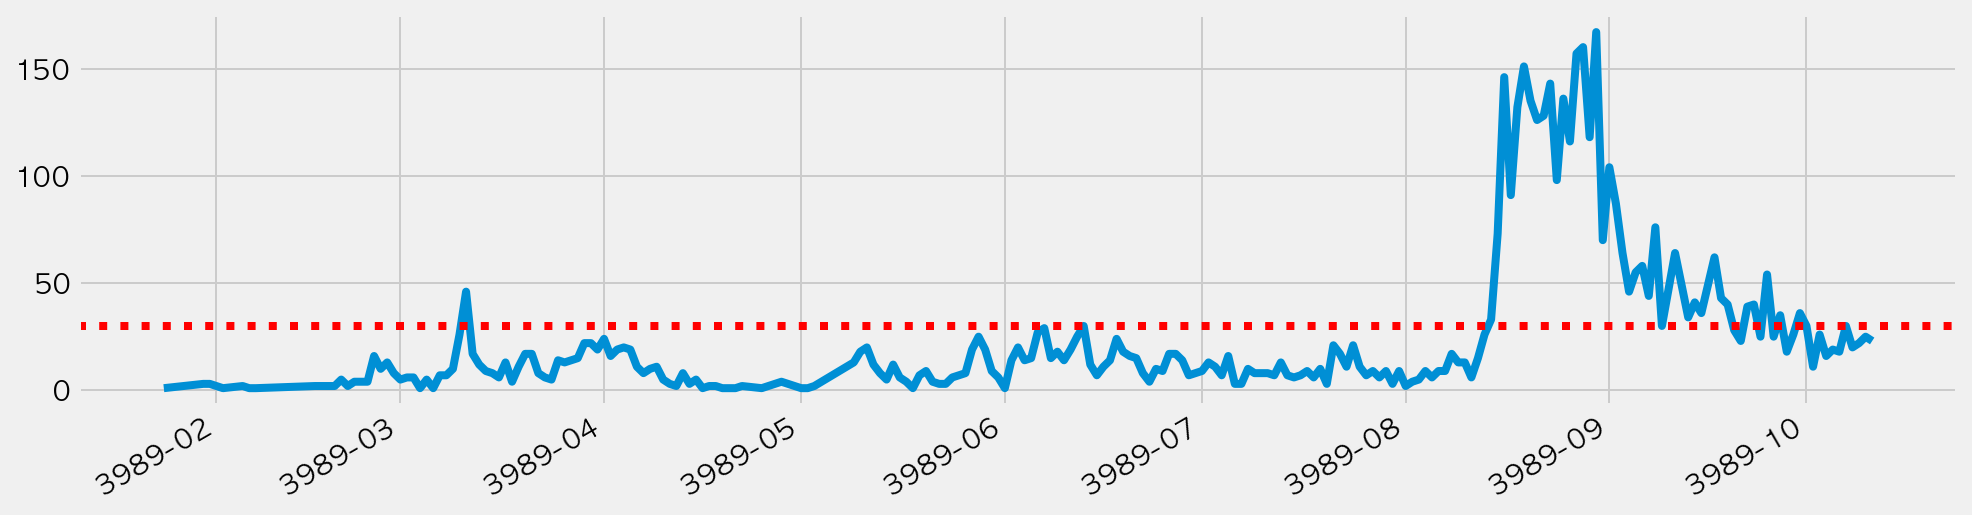

In [24]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [25]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5533,24567,10.10.,용산구,-,기타 확진자 접촉,NaN,2020-10-10,10,41,10-10
1,5532,24590,10.10.,강동구,브라질,해외 접촉 추정,NaN,2020-10-10,10,41,10-10
2,5531,24589,10.10.,송파구,NaN,기타 확진자 접촉,NaN,2020-10-10,10,41,10-10
3,5530,24588,10.10.,송파구,NaN,기타 확진자 접촉,NaN,2020-10-10,10,41,10-10
4,5529,24587,10.10.,노원구,NaN,도봉구 다나병원,NaN,2020-10-10,10,41,10-10
5,5528,24560,10.10.,마포구,우즈베키스탄,해외 접촉 추정,NaN,2020-10-10,10,41,10-10
6,5527,24557,10.10.,중구,NaN,기타 확진자 접촉,NaN,2020-10-10,10,41,10-10
7,5526,24585,10.10.,타시도,NaN,타시도 확진자 접촉,NaN,2020-10-10,10,41,10-10
8,5525,24571,10.10.,타시도,NaN,기타 확진자 접촉,NaN,2020-10-10,10,41,10-10
9,5524,24602,10.10.,타시도,NaN,기타 확진자 접촉,NaN,2020-10-10,10,41,10-10


In [26]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    232.000000
mean      23.849138
std       33.562613
min        1.000000
25%        6.000000
50%       12.000000
75%       24.250000
max      167.000000
Name: 월일, dtype: float64

In [27]:
# get 10 days of recent confirmed cases
day_count[-10:]

10-01    11
10-02    26
10-03    16
10-04    19
10-05    18
10-06    30
10-07    20
10-08    22
10-09    25
10-10    23
Name: 월일, dtype: int64

In [28]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [29]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-24"]
df_day.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1573,3960,18896,8.24.,타시도,-,동작구 진흥글로벌,NaN,2020-08-24,8,35,08-24
2149,3384,17889,8.24.,타시도,-,다래경매 관련,퇴원,2020-08-24,8,35,08-24
2413,3120,17828,8.24.,노원구,-,확인 중,NaN,2020-08-24,8,35,08-24
2414,3119,17903,8.24.,성동구,-,8.15서울도심집회,퇴원,2020-08-24,8,35,08-24
2415,3118,17913,8.24.,광진구,-,8.15서울도심집회,NaN,2020-08-24,8,35,08-24
2416,3117,17876,8.24.,광진구,-,확인 중,퇴원,2020-08-24,8,35,08-24
2417,3116,17866,8.24.,광진구,-,확인 중,퇴원,2020-08-24,8,35,08-24
2418,3115,17656,8.24.,타시도,-,타시도 확진자 접촉,퇴원,2020-08-24,8,35,08-24
2419,3114,17618,8.24.,광진구,-,확인 중,퇴원,2020-08-24,8,35,08-24
2420,3113,17598,8.24.,타시도,-,8.15서울도심집회,퇴원,2020-08-24,8,35,08-24


In [30]:
# Covid19 infection classified with patients' contact to the disease
number_of_paths = len(df["접촉력"].unique()) # get unique value for types of contagion route 
print(f"Total number of paths for infection: {number_of_paths}")
df["접촉력"].unique()

Total number of paths for infection: 278


array(['기타 확진자 접촉', '해외 접촉 추정', '도봉구 다나병원', '타시도 확진자 접촉', '감염경로 조사중',
       '도봉구 예마루데이케어센터', '영등포구 방문판매업체 관련', '관악구 사랑나무 어린이집',
       '관악구 큰믿음유신감리교회', '동대문구 성경모임', '강북구 북서울 꿈의교회', '강남구 소재 대우디오빌플러스',
       '서초구 병원 관련', '영등포구 LG트윈타워', '서초구 소재 카페', '관악구 지인모임', '동작구 부동산 회사',
       '관악구 휘트니스 관련', '동작구 가족관련', '마포구 서울디자인 고등학교', '강남구 삼성화재',
       '양천구 양천경찰서', '서초구 LG 유플러스', '고양시부부관련', '관악구 가족 관련', '관악구 식당 관련',
       '고양시부부관련(마포구어린이집&서초구우체국)', '관악구가족 관련(가가호호데이케어센터)', '관악구 삼모스포렉스',
       '신도림 역사 관련', '강남구 디와이디벨로먼트', '송파구 우리교회', '중랑구 서울의료원', '종로구 서울대병원',
       '성동구 덕수고 야구부', '프로그래머 지인모임', '강남구 신도벤처타워', '강남구 K보건산업', '건축설명회',
       '종로구청 관련', '강남구 통신판매업', '도봉구 소재 아파트 관련', '영등포 소재 증권회사',
       '서대문구 세브란스병원', '영등포구 소재 마트 관련', '강남구 소재 금융회사', '동작구 요양시설 관련',
       '9월 송파구 지인모임', '은평구 수색성당', '서울지방국세청 관련', '수도권 지인모임', '서대문구 지인모임',
       '영등포 지인모임', '관악구 에바다 관련', '광진구 혜민병원', '8.15서울도심집회', '도봉구 건설현장',
       '도봉구 운동시설', '송파구 쿠팡 관련', '노원구 빛가온교회 관련', '서초구 장애인교육시설',
       '강동구 BF모바일 관련', '영등포구 일련정

In [31]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [50]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"
df.loc[df["접촉력"].str.contains("조사 중"),"접촉력"] = "확인 중"
df.loc[df["접촉력"].str.contains("조사중"),"접촉력"] = "확인 중"


# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [51]:
df["접촉력"].value_counts().head(20)

확인 중             977
기타 확진자 접촉        769
성북구 사랑제일교회 관련    641
해외 접촉 추정         411
타시도 확진자 접촉       234
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
구로구 콜센터 관련        60
도봉구 다나병원          59
노원구 빛가온교회 관련      46
성북구 체대입시 관련       43
양천구 운동시설 관련       43
요양시설 관련           43
용인시 우리제일교회 관련     41
구로구 교회 관련         41
수도권 개척교회 관련       37
극단 산 관련           37
강남구 K보건산업         37
서대문구 세브란스병원       37
Name: 접촉력, dtype: int64

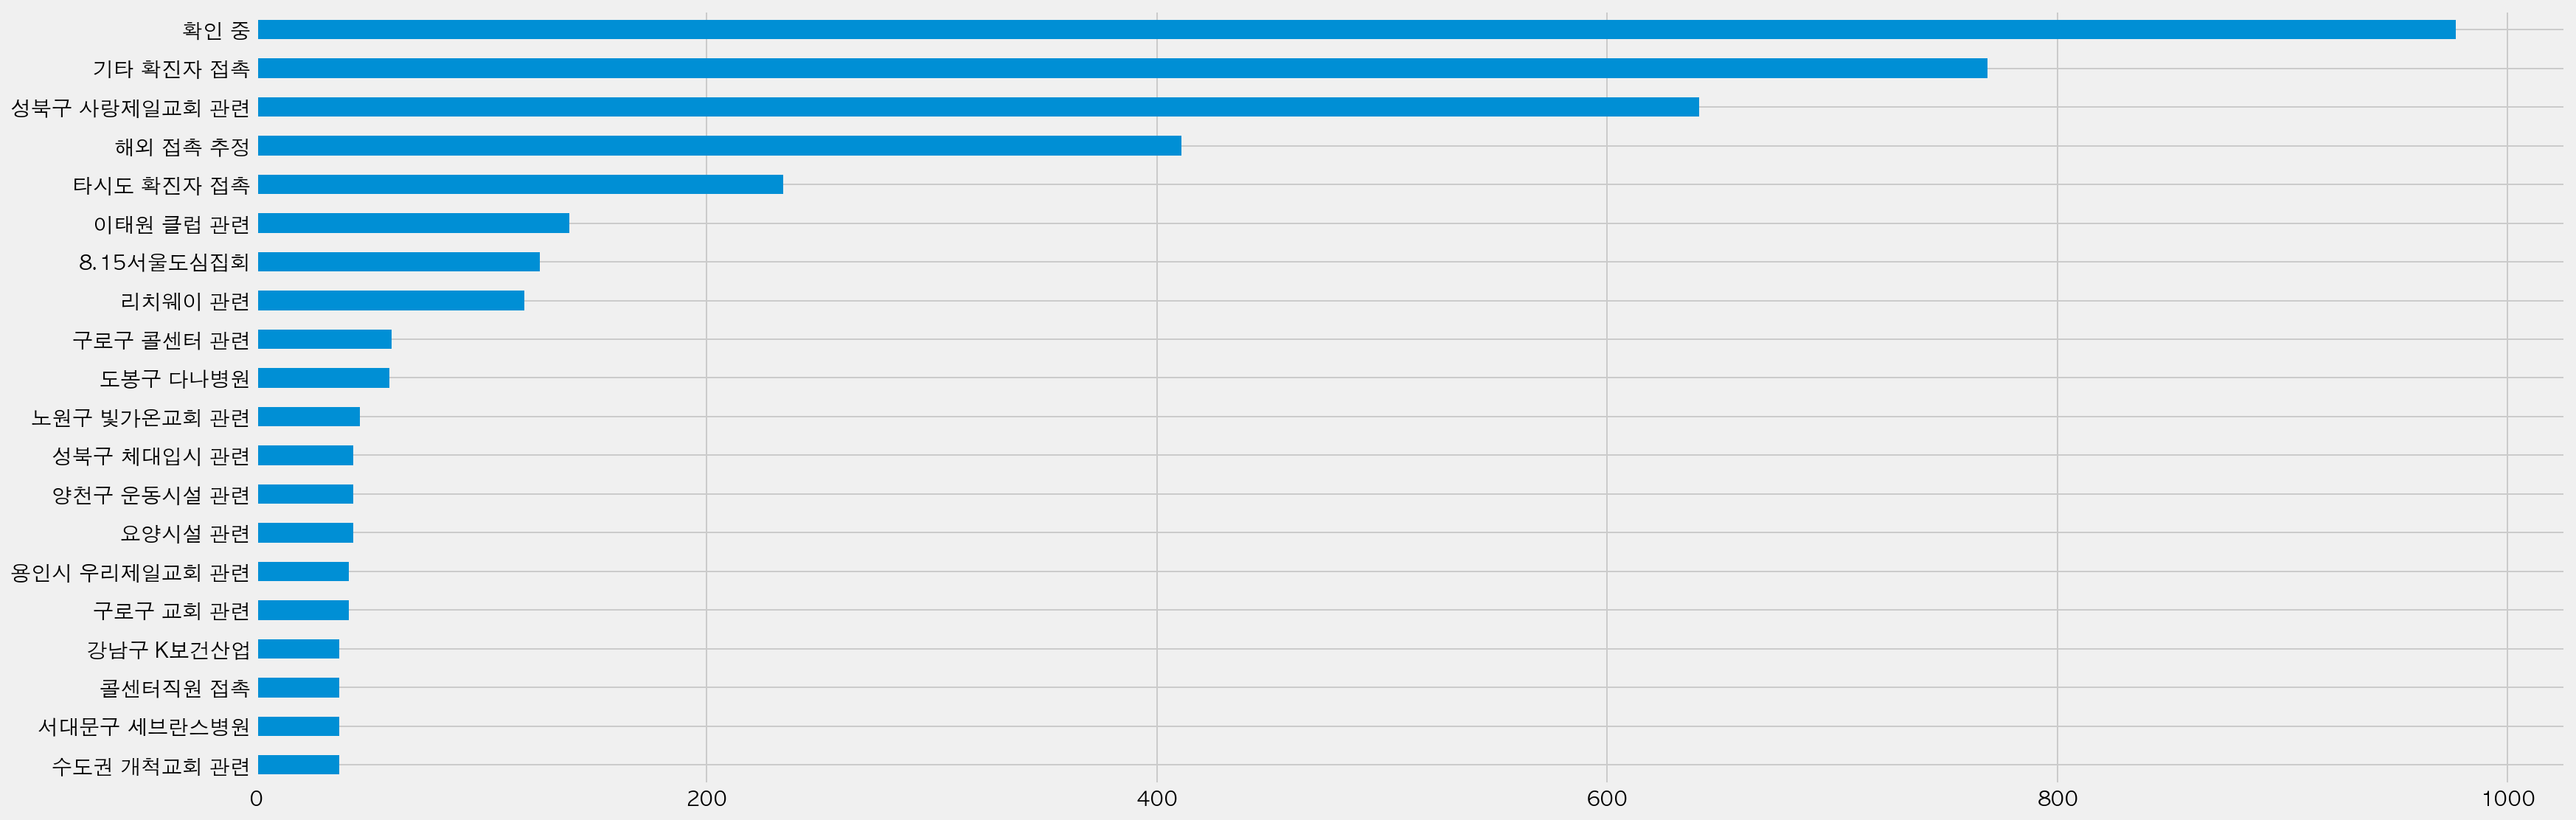

In [52]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [53]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [54]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

확인 중             977
기타 확진자 접촉        769
성북구 사랑제일교회 관련    641
해외 접촉 추정         411
타시도 확진자 접촉       234
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
구로구 콜센터 관련        60
도봉구 다나병원          59
노원구 빛가온교회 관련      46
성북구 체대입시 관련       43
양천구 운동시설 관련       43
요양시설 관련           43
용인시 우리제일교회 관련     41
Name: 접촉력, dtype: int64

In [55]:
# 
top_count_recent = df.loc[df["확진일자"]>="2020-08-12", "접촉력"].value_counts().head(10)
top_count_recent

확인 중             772
기타 확진자 접촉        769
성북구 사랑제일교회 관련    641
타시도 확진자 접촉       183
8.15서울도심집회       126
해외 접촉 추정          70
도봉구 다나병원          59
노원구 빛가온교회 관련      46
성북구 체대입시 관련       43
용인시 우리제일교회 관련     41
Name: 접촉력, dtype: int64

## 감염경로 불명

In [56]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
10,5523,24574,10.10.,영등포구,NaN,확인 중,NaN,2020-10-10,10,41,10-10
14,5519,24584,10.10.,강서구,NaN,확인 중,NaN,2020-10-10,10,41,10-10
16,5517,24582,10.10.,강서구,NaN,확인 중,NaN,2020-10-10,10,41,10-10
20,5513,24569,10.10.,도봉구,NaN,확인 중,NaN,2020-10-10,10,41,10-10
23,5510,24530,10.09.,도봉구,-,확인 중,NaN,2020-10-09,10,41,10-09
...,...,...,...,...,...,...,...,...,...,...,...
5477,56,1768,2.25.,은평구,-,확인 중,퇴원,2020-02-25,2,9,02-25
5491,42,1370,2.25.,송파구,-,확인 중,퇴원,2020-02-25,2,9,02-25
5494,39,924,2.25.,금천구,-,확인 중,퇴원,2020-02-25,2,9,02-25
5495,38,907,2.25.,타시도,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

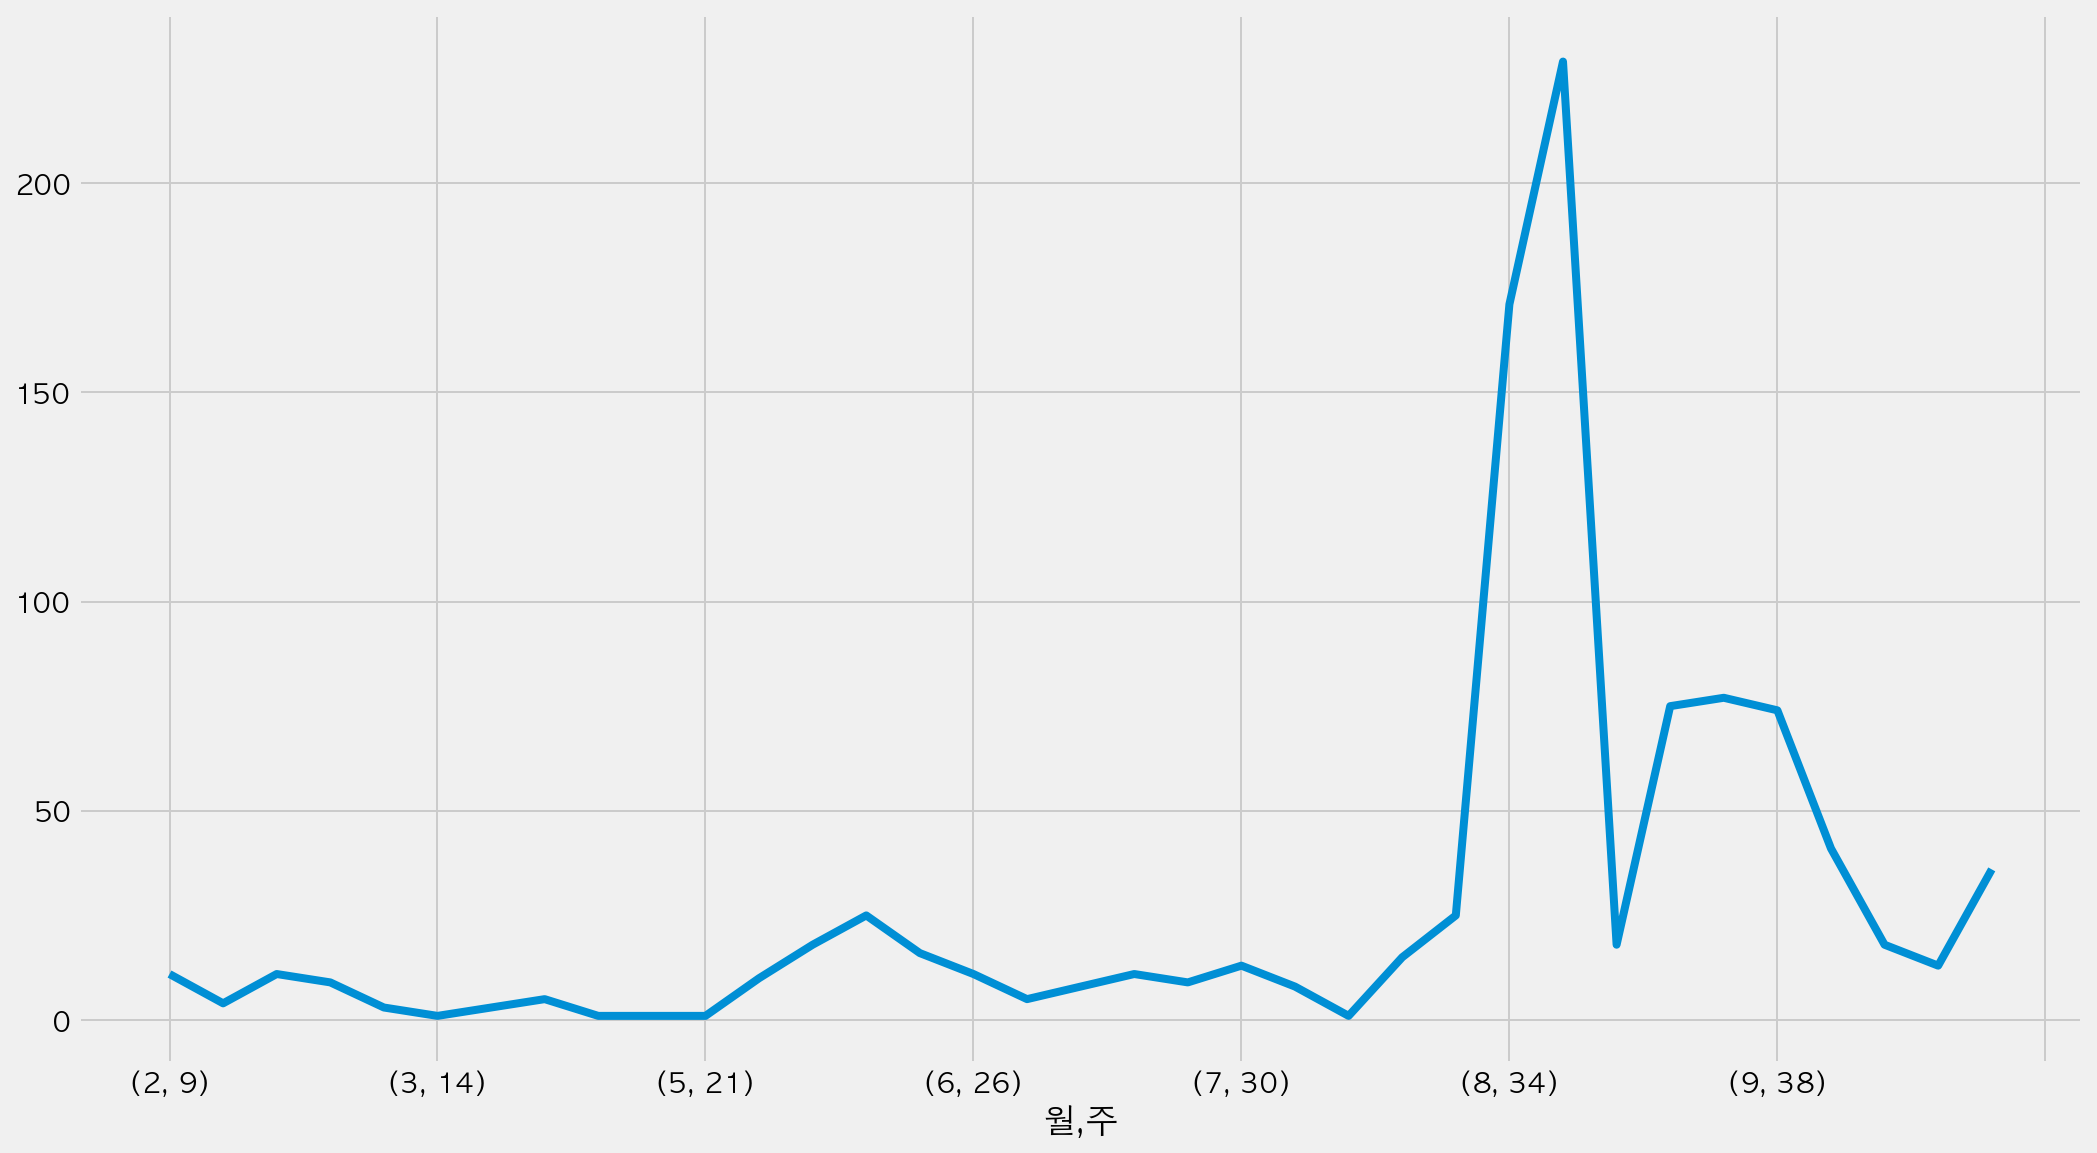

In [57]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [58]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
35,924
34,913
36,458
33,390
37,341


In [59]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
35,229
34,171
36,93
37,77
38,74


In [60]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [61]:
comparison[-4:]

,전체확진자수,불명확진수
38,281,74
39,236,41
40,164,31
41,138,36


<AxesSubplot:>

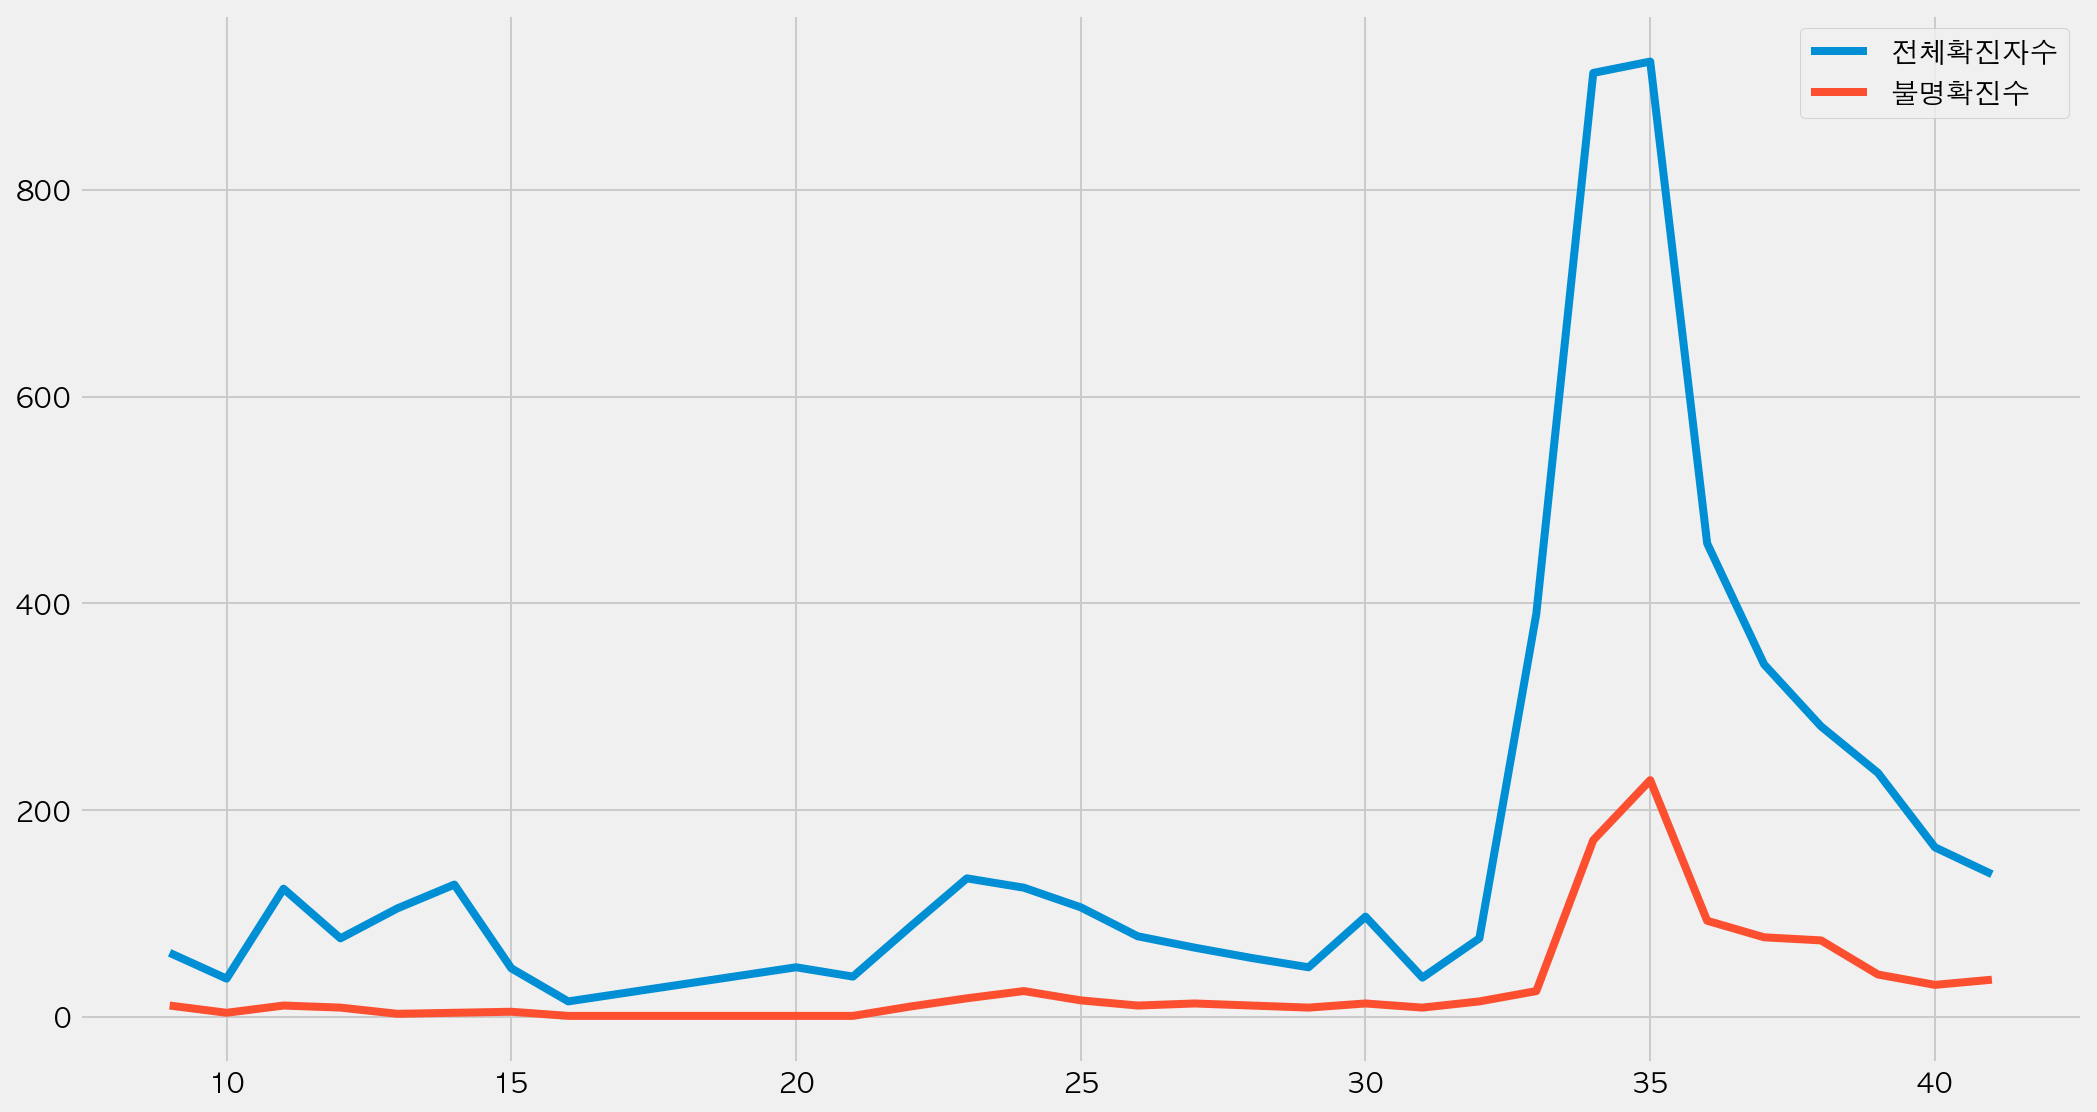

In [62]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [63]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [64]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    13.402062
31    23.684211
32    19.736842
33     6.410256
34    18.729463
35    24.783550
36    20.305677
37    22.580645
38    26.334520
39    17.372881
40    18.902439
41    26.086957
dtype: float64

In [65]:
percentages[-4:]

38    26.334520
39    17.372881
40    18.902439
41    26.086957
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
18.729463307776562
24.783549783549784
20.305676855895197
22.58064516129032
26.334519572953734
18.902439024390244
26.08695652173913


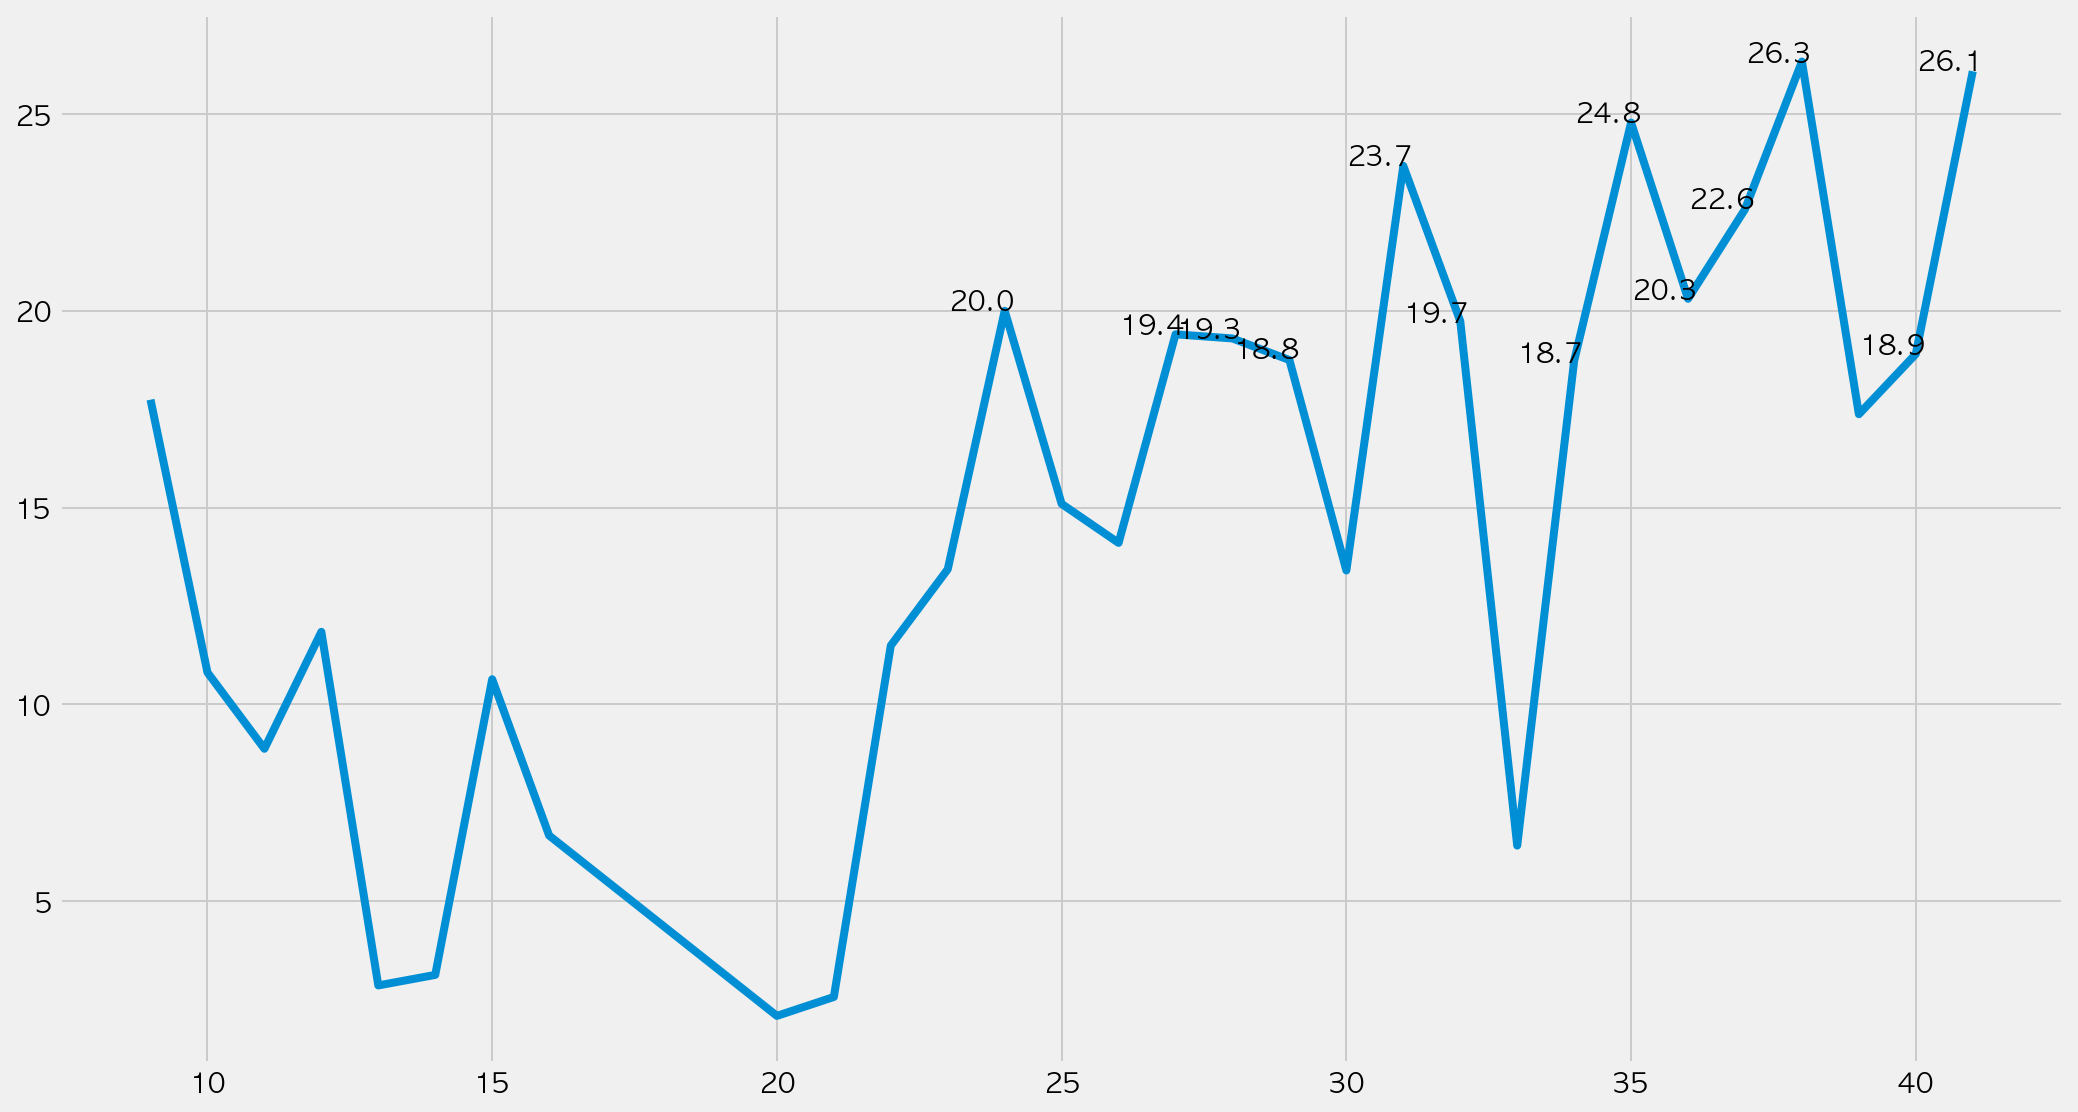

In [66]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [67]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')